# <h1><center> COMMUNICATION THROUGH DATA and STORY THROUGH VISUALIZATION </center></h1>

## Exploratory Data Analysis (EDA)

### Meenakshi Nerolu           

## Importing Libraries

In [1]:
## import packages:
import numpy as np # for vector operations
from numpy import percentile
import pandas as pd # for Data Frame methods
import matplotlib.pyplot as plt # Two dimensional plotting library
import matplotlib as mpl
import seaborn as sns #  library for making statistical graphics
import plotly 
#import plotly.offline as plt
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px

### Adjusting Figure Size ##

#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 12
#fig_size[1] = 6
#plt.rcParams.update({'font.size':12})

# 1.Traffic Violation <a class="anchor" id="sec3"></a> 

## Loading the Dataset

 ## Reading "Traffic_Violations" data <a class="anchor" id="subsec_3_1"></a>  

In [2]:
    # Reading csv file
    #traffic = pd.read_csv("Traffic_Violations.csv",low_memory=False)
    
    ## Downloading & Reading csv file from website
    url = 'https://data.montgomerycountymd.gov/api/views/4mse-ku6q/rows.csv?accessType=DOWNLOAD'
    traffic = pd.read_csv(url,low_memory=False)


In [3]:
"""" UseFeatues() Function when called, returns a dataframe with additional features"""

def useFeatures(traffic):

    ## Formatting the Date
    
    # Confirm the date column is in datetime format
    traffic['Date Of Stop'] = pd.to_datetime(traffic['Date Of Stop'])

    # Confirm the  time column is in datetime format
    traffic['Time Of Stop'] = pd.to_datetime(traffic['Time Of Stop'])
    # creating  new columns: date, year, month, day, time 
    traffic['date'] = pd.to_datetime(traffic['Date Of Stop'])
    traffic['year'] = traffic['Date Of Stop'].dt.year
    traffic['month'] = traffic['Date Of Stop'].dt.month
    traffic['time'] = traffic['Time Of Stop'].dt.time
    traffic['hour'] = traffic['Time Of Stop'].dt.hour
    traffic['day'] = traffic['Date Of Stop'].dt.weekday_name
    
    traffic = traffic.sort_values(by='date')
    

    
    ## Filtering the Desired Date Range - 2015 to 2020 ##
    traffic = traffic[traffic.date >='01/01/2015']
    traffic = traffic[traffic.date <'10/23/2020']
    traffic = traffic.reset_index(drop=True)
    
    traffic['season']= "Fall"
    traffic.loc[(traffic['month'] < 3) | (traffic['month'] >= 12), "season"] = 'Winter'
    traffic.loc[(traffic['month'] < 6) & (traffic['month'] >= 3), "season"] = 'Spring'
    traffic.loc[(traffic['month'] < 9) & (traffic['month'] >= 6), "season"] = 'Summer'
    
    ## Hour status
    ##traffic["hourStatus"] = "Evening"
    ## traffic.loc[( traffic["hour"] < 18) & ( traffic["wdayStatus"] == "Weekday"), "hourStatus"]="WorkHour"
    
    #Creating a new column to count the total number of violation
    traffic['Violation'] = pd.Series(1, index=traffic.index)
    
    return traffic

In [4]:
# All the above features are stored in new data frame "traffic_features"
traffic_features = useFeatures(traffic)

In [5]:
traffic_features.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Arrest Type,Geolocation,date,year,month,time,hour,day,season,Violation
0,5959dca9-d771-433b-8ed1-43e9cd51ca7c,2015-01-01,2020-10-25 23:57:00,MCP,"4th District, Wheaton",DRIVING VEH. W/O ADEQUATE REAR REG. PLATE ILLU...,UNIVERSITY/ARCOLA,39.035272,-77.025585,No,...,A - Marked Patrol,"(39.0352716666667, -77.025585)",2015-01-01,2015,1,23:57:00,23,Thursday,Winter,1
1,88f3b9bf-3b96-4532-8431-387c9a8b2dbe,2015-01-01,2020-10-25 18:04:00,MCP,"4th District, Wheaton",FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,UNIVERSITY BLVD W/VEIRS MILL RD,39.040385,-77.054823,No,...,A - Marked Patrol,"(39.040385, -77.0548233333333)",2015-01-01,2015,1,18:04:00,18,Thursday,Winter,1
2,c1866ecb-42b9-4903-b4a6-1e2769febd2d,2015-01-01,2020-10-25 18:27:00,MCP,"6th District, Gaithersburg / Montgomery Village",DRIVING UNDER THE INFLUENCE OF ALCOHOL PER SE,SHADY GROVE/CRABBS BRANCH,39.149482,-77.233880,No,...,A - Marked Patrol,"(39.1494816666667, -77.23388)",2015-01-01,2015,1,18:27:00,18,Thursday,Winter,1
3,415c5e78-636f-4d04-9c12-685b78e93f02,2015-01-01,2020-10-25 03:07:00,MCP,"5th District, Germantown",DRIVER FAILURE TO OBEY DESIGNATED LANE DIRECTIONS,27@ 355,39.203698,-77.249860,No,...,A - Marked Patrol,"(39.2036983333333, -77.24986)",2015-01-01,2015,1,03:07:00,3,Thursday,Winter,1
4,5e5763fd-490a-4be4-b50d-15ef690d3fba,2015-01-01,2020-10-25 22:09:00,MCP,"3rd District, Silver Spring",FAILURE TO DISPLAY TWO LIGHTED FRONT LAMPS WHE...,RT 29 SB AT BLACKBURN,39.106443,-76.932277,No,...,Q - Marked Laser,"(39.1064433333333, -76.9322766666667)",2015-01-01,2015,1,22:09:00,22,Thursday,Winter,1


In [6]:
## Replace white space everywhere
traffic_features.columns = traffic_features.columns.str.replace(' ', '')

Text(0.5, 0.9, 'Missing values By Variable')

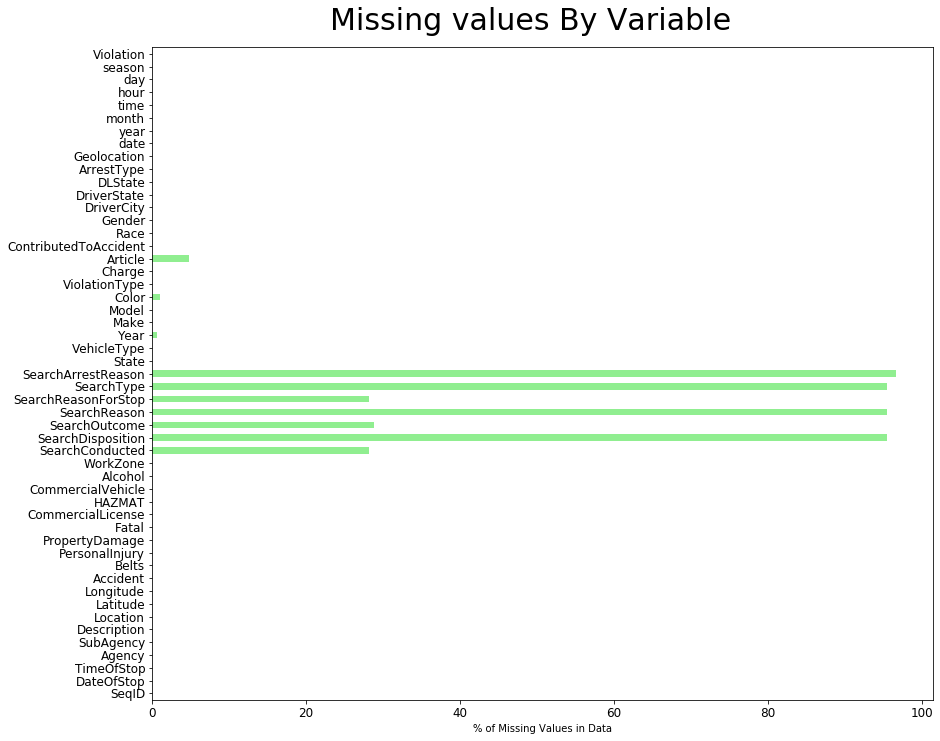

In [7]:
    missing_var = 100*traffic_features.isnull().sum()/traffic_features.shape[0]
    missing_var.sort_values()
   # print(100*traffic_features.isnull().sum()/traffic_features.shape[0]) #missing_var2.index
    plot = missing_var.plot(kind='barh',figsize=(14,12), grid = False,label="Percentage",color='lightgreen',fontsize=12)
    plot.set_xlabel("% of Missing Values in Data")
    plt.figtext(.5,0.9,'Missing values By Variable',fontsize=30,ha='center')

In the traffic data, the columns, Search Arrest Reason, Search Type, Search Reason for stop, Search Reason, Search Outcome, Search Disposition and Search Conducted have highest missing values. Hence, these columns are deleted and other missing values are replaced by 0.

In [8]:
 traffic_features.columns

Index(['SeqID', 'DateOfStop', 'TimeOfStop', 'Agency', 'SubAgency',
       'Description', 'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'PersonalInjury', 'PropertyDamage', 'Fatal', 'CommercialLicense',
       'HAZMAT', 'CommercialVehicle', 'Alcohol', 'WorkZone', 'SearchConducted',
       'SearchDisposition', 'SearchOutcome', 'SearchReason',
       'SearchReasonForStop', 'SearchType', 'SearchArrestReason', 'State',
       'VehicleType', 'Year', 'Make', 'Model', 'Color', 'ViolationType',
       'Charge', 'Article', 'ContributedToAccident', 'Race', 'Gender',
       'DriverCity', 'DriverState', 'DLState', 'ArrestType', 'Geolocation',
       'date', 'year', 'month', 'time', 'hour', 'day', 'season', 'Violation'],
      dtype='object')

## Replace Yes or No by 0 and 1 and NA's by 0

In [9]:
    ## Replace Yes and No by 1 and 0 respectively
traffic_replace = traffic_features.replace( {'Yes' : 1, 'No' : 0})
    
    ## Fill all the NA's by 0
traffic_replace = traffic_replace.fillna(0)
    
    ## replace the column name Year by Year_model
traffic_replace = traffic_replace.rename(columns={"Year":"Year_model"})
    
    # Delete the following columns as these columns have the highest number of NA's
delete_columns = traffic_replace[['SeqID', 'SearchConducted', 'SearchDisposition', 'SearchOutcome' , 'SearchReason', 'SearchReasonForStop', 'SearchType', 'SearchArrestReason']]
    
    # Delete these columns from the data frame, traffic_new
traffic_new = traffic_replace.drop(delete_columns ,axis=1)

In [10]:
traffic_new["Color"].value_counts()

BLACK          238423
SILVER         205937
WHITE          181681
GRAY           135995
RED             84811
BLUE            80203
GREEN           31456
GOLD            30821
BLUE, DARK      23977
TAN             19365
MAROON          17350
BLUE, LIGHT     13165
0               11538
BEIGE           10959
GREEN, DK        9590
GREEN, LGT       5311
BROWN            4646
YELLOW           3960
ORANGE           3704
BRONZE           2400
PURPLE           1942
MULTICOLOR        757
CREAM             543
COPPER            344
PINK              142
CHROME             30
CAMOUFLAGE         26
Name: Color, dtype: int64

In [11]:
#rename the colors :
traffic_new = traffic_new.replace({"BLUE, DARK":"BLUE" , "BLUE, LIGHT":"BLUE", "GREEN, DK":"GREEN", "GREEN, LGT":"GREEN" })
traffic_new.head()

,DateOfStop,TimeOfStop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,ArrestType,Geolocation,date,year,month,time,hour,day,season,Violation
0,2015-01-01,2020-10-25 23:57:00,MCP,"4th District, Wheaton",DRIVING VEH. W/O ADEQUATE REAR REG. PLATE ILLU...,UNIVERSITY/ARCOLA,39.035272,-77.025585,0,0,...,A - Marked Patrol,"(39.0352716666667, -77.025585)",2015-01-01,2015,1,23:57:00,23,Thursday,Winter,1
1,2015-01-01,2020-10-25 18:04:00,MCP,"4th District, Wheaton",FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,UNIVERSITY BLVD W/VEIRS MILL RD,39.040385,-77.054823,0,0,...,A - Marked Patrol,"(39.040385, -77.0548233333333)",2015-01-01,2015,1,18:04:00,18,Thursday,Winter,1
2,2015-01-01,2020-10-25 18:27:00,MCP,"6th District, Gaithersburg / Montgomery Village",DRIVING UNDER THE INFLUENCE OF ALCOHOL PER SE,SHADY GROVE/CRABBS BRANCH,39.149482,-77.233880,0,0,...,A - Marked Patrol,"(39.1494816666667, -77.23388)",2015-01-01,2015,1,18:27:00,18,Thursday,Winter,1
3,2015-01-01,2020-10-25 03:07:00,MCP,"5th District, Germantown",DRIVER FAILURE TO OBEY DESIGNATED LANE DIRECTIONS,27@ 355,39.203698,-77.249860,0,0,...,A - Marked Patrol,"(39.2036983333333, -77.24986)",2015-01-01,2015,1,03:07:00,3,Thursday,Winter,1
4,2015-01-01,2020-10-25 22:09:00,MCP,"3rd District, Silver Spring",FAILURE TO DISPLAY TWO LIGHTED FRONT LAMPS WHE...,RT 29 SB AT BLACKBURN,39.106443,-76.932277,0,0,...,Q - Marked Laser,"(39.1064433333333, -76.9322766666667)",2015-01-01,2015,1,22:09:00,22,Thursday,Winter,1


In [12]:
print("Size of the data frame : ", traffic_new.shape)
#info() is used to check the Information about the data and the datatypes of each respective attribute.
print("Summary of columns ", traffic_new.info(verbose = False))
#This code prints a summary of columns count and its dtypes but not per column information.
print("\n\nThe column names in the dataframe \n\n :", traffic_new.columns)

Size of the data frame :  (1119076, 43)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119076 entries, 0 to 1119075
Columns: 43 entries, DateOfStop to Violation
dtypes: bool(1), datetime64[ns](3), float64(3), int64(14), object(22)
memory usage: 359.7+ MB
Summary of columns  None


The column names in the dataframe 

 : Index(['DateOfStop', 'TimeOfStop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'PersonalInjury', 'PropertyDamage', 'Fatal', 'CommercialLicense',
       'HAZMAT', 'CommercialVehicle', 'Alcohol', 'WorkZone', 'State',
       'VehicleType', 'Year_model', 'Make', 'Model', 'Color', 'ViolationType',
       'Charge', 'Article', 'ContributedToAccident', 'Race', 'Gender',
       'DriverCity', 'DriverState', 'DLState', 'ArrestType', 'Geolocation',
       'date', 'year', 'month', 'time', 'hour', 'day', 'season', 'Violation'],
      dtype='object')


# Data Visualization

## How the total violation changed over year?

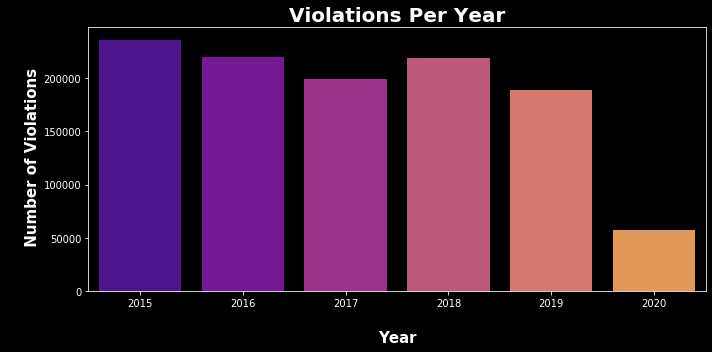

In [13]:
violationperyear = traffic_new.groupby(['year'])['Violation'].count()

# sns barplot
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
colors = sns.color_palette("plasma", n_colors=7)
sns.barplot(violationperyear.index,violationperyear.values, palette=colors)
#sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Violations Per Year",fontsize=20, fontweight="bold")
plt.xlabel("\nYear", fontsize=15, fontweight="bold")
plt.ylabel("\n Number of Violations", fontsize=15, fontweight="bold")
#plt.savefig('violationperyear.jpg')
plt.tight_layout()

## How the total violation changed over month?

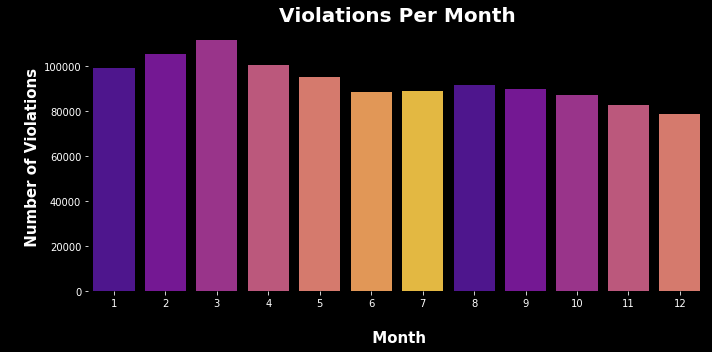

In [14]:
violationpermonth = traffic_new.groupby(['month'])['Violation'].count()

# sns barplot
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
colors = sns.color_palette("plasma", n_colors=7)
sns.barplot(violationpermonth.index,violationpermonth.values, palette=colors)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Violations Per Month",fontsize=20,fontweight="bold")
plt.xlabel("\n Month", fontsize=15, fontweight="bold")
plt.ylabel("\n Number of Violations", fontsize=15, fontweight="bold")
#plt.savefig('violationpermonth.jpg')
plt.tight_layout()

## Heatmap to show on which year and day there was highest number of violations?

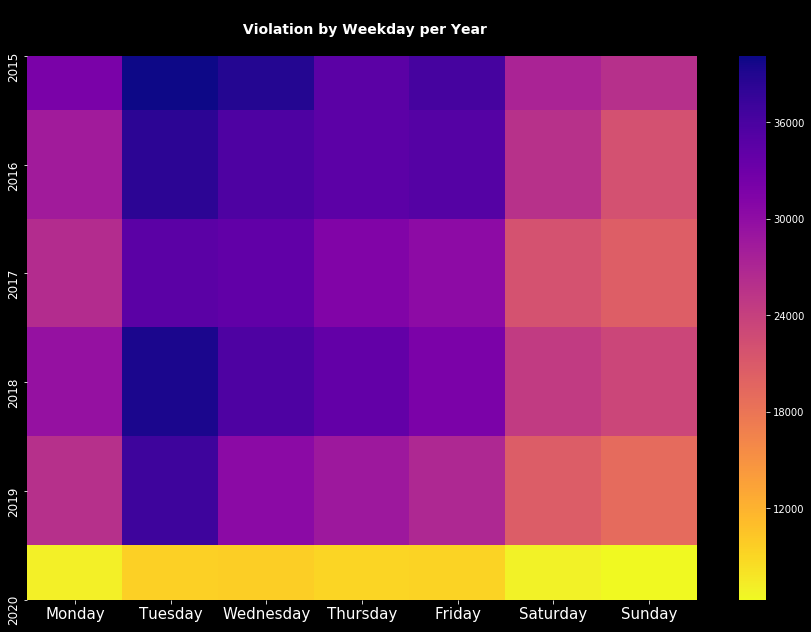

In [15]:
weekdays = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
violationweekday = traffic_new.groupby(['year', 'day']).size()
#Reshape using unstack() function in Pandas python: 
violationweekday = violationweekday.rename_axis(['year', 'day'])\
                               .unstack('day')\
                               .reindex(columns=weekdays)
plt.figure(figsize=(15,10))
plt.style.use('dark_background')
sns.heatmap(violationweekday, cmap='plasma_r')
plt.title('\n Violation by Weekday per Year\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
#plt.savefig('violationsbyweekdayperyear.jpg')
plt.show()

In [16]:
violationweekday

day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
year,,,,,,,
2015,31965,40101,38904,34639,36405,27429,25927
2016,28306,38352,35621,34507,35200,25729,22043
2017,26312,34669,34104,31355,30321,21927,20482
2018,29418,39336,35747,33962,31870,24658,23296
2019,25906,37004,30416,28719,26800,20645,19099
2020,7001,9537,9738,9168,9250,6883,6325


## How the total violation changed over season?

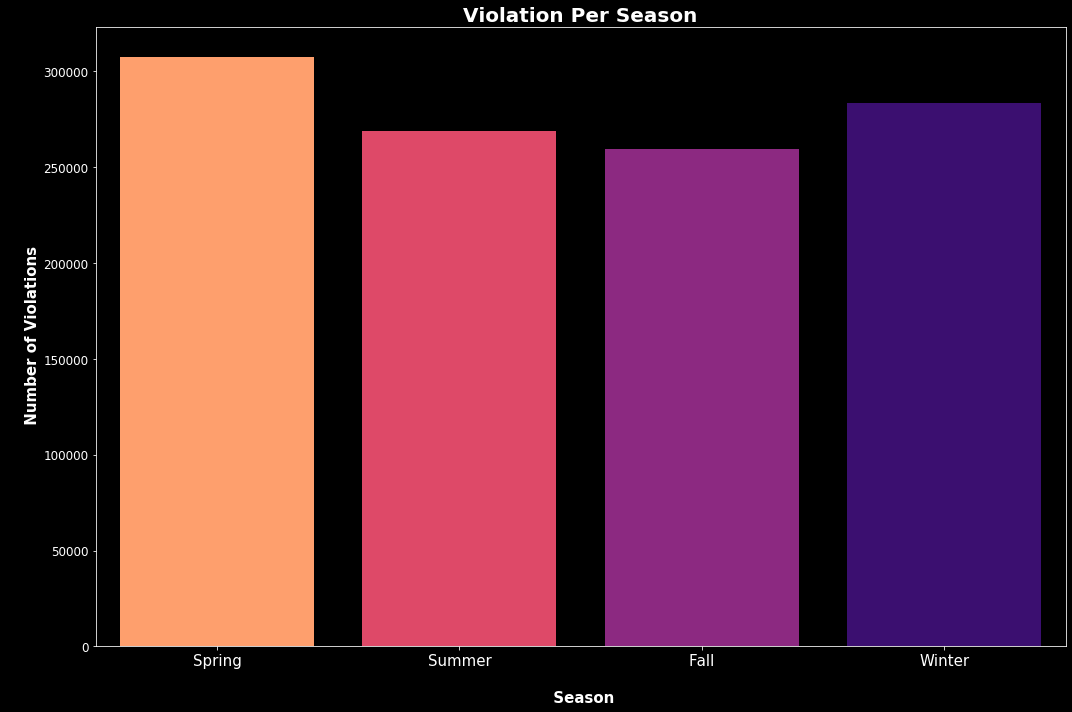

In [17]:
violationperseason = traffic_new.groupby(['season'])['Violation'].count()
season_order=['Spring', 'Summer', 'Fall','Winter']
#plot
plt.style.use('dark_background')
plt.figure(figsize=(15,10))

sns.barplot(violationperseason.index,violationperseason.values, order=season_order, 
            saturation=1, palette='magma_r')
plt.title("Violation Per Season",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("\n Season", fontsize=15, fontweight="bold")
plt.ylabel("\n Number of Violations", fontsize=15, fontweight="bold")
plt.tight_layout()
#plt.savefig('violationperseason.jpg')

## Grouping the time to determine the rush hour traffic

In [18]:
#"Morning Rush (6-10)", "Day (10-12)", "Lunch Rush (12-14)","Afternoon (14-16)",
#"After Work Rush (16-18)", "Evening (18-22)", "Night (22-6)"


#traffic_new['Rush_time'] = traffic.loc[ (traffic_new["hour"] >  5) & (traffic_new["hour"]  < 10)] = 'Morning rush'
#traffic_new['Rush_time'] = traffic.loc[ (traffic_new["hour"] > 10) & (traffic_new["hour"] < 12)]  = 'Day'
#traffic_new['Rush_time'] = traffic.loc[ (traffic_new["hour"] > 12) & (traffic_new["hour"] < 14)]  = 'Lunch rush'
#traffic_new['Rush_time'] = traffic.loc[ (traffic_new["hour"] > 14) & (traffic_new["hour"] < 16)]  = 'Afternoon'
#traffic_new['Rush_time'] = traffic.loc[ (traffic_new["hour"] > 16) & (traffic_new["hour"] < 18)]  = 'Evening rush'
#traffic_new['Rush_time'] = traffic.loc[ (traffic_new["hour"] > 18) & (traffic_new["hour"] < 22)]  = 'Evening'
#traffic_new['Rush_time'] = traffic.loc[ (traffic_new["hour"] > 22) & (traffic_new["hour"] < 24)]  = 'Night'

In [19]:
#dataframe with Warning
#viol_Warning = traffic_new.groupby(traffic_new['ViolationType']=="Warning")['Violation'].count()
#print("Violation involoving warning:", Warning.shape)

#dataframe with Citation
#viol_Citation = traffic_new.groupby(traffic_new['ViolationType']=="Citation")['Violation'].count()
#print("Violation involoving Citation:", Warning.shape)

#dataframe with SERO
#viol_ESERO = traffic_new.groupby(traffic_new['ViolationType']=="ESERO")['Violation'].count()
#print("Violation involoving SERO:", ESERO.shape)

#setups for adding frequencies to visualizations
#datatotal= float(len(traffic_new))
#Warningtotal= float(len(viol_Warning))
#Citationtotal= float(len(viol_Citation))

In [20]:
#genderorder = ['Female', 'Male', 'Unknown']
#plt.figure(figsize = (10,5))
#fig, ax =plt.subplots(1,2,figsize = (15,8))
#sns.despine(top=True, right=True, left=False, bottom=False)
#ax1 = sns.countplot('ViolationType', hue = 'Gender', hue_order = genderorder, data = viol_Citation, ax = ax[0])
#ax2 = sns.countplot('ViolationType', hue = 'Gender', hue_order = genderorder, data = viol_Warning, ax = ax[1])
#fig.subtitle('Sex of Driver in Violations', fontsize=20, fontweight='bold')
#ax1.set_xlabel('\n Sex of Driver involved in violation and got Citation', fontsize=20, fontweight='bold')
#ax2.set_xlabel('\n Sex of Driver involved in violation and got Warning', fontsize=20, fontweight='bold')
#ax1.set_ylabel('Number of Violations', fontsize=20, fontweight='bold')
#ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
#ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
#ax2.set_ylabel('')

#lt.savefig('sex_of_driver.png')
#fig.show()

## Which Vehicle type and color gender have the highest violation?

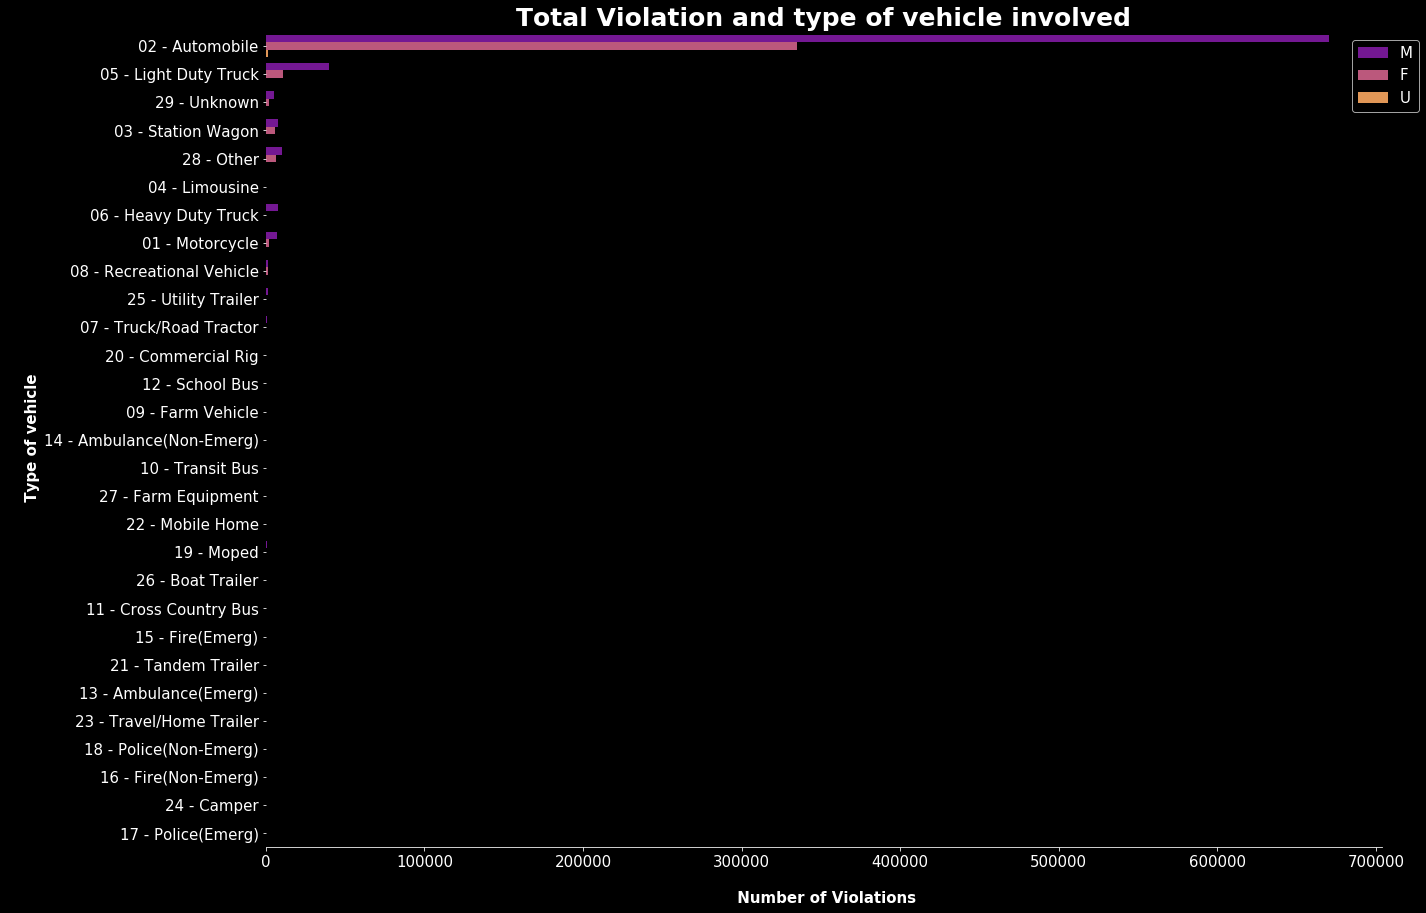

In [21]:
plt.figure(figsize=(20,15))
ax=sns.countplot(y  = 'VehicleType', hue="Gender",
              palette="plasma", data=traffic_new)

plt.style.use('dark_background')
plt.title("Total Violation and type of vehicle involved",fontsize=25,fontweight="bold")
plt.xlabel("\n Number of Violations", fontsize=15, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='22', loc = 'upper right')
plt.ylabel("\n Type of vehicle", fontsize=15, fontweight="bold")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize='15', bbox_to_anchor=(1.04, 1), loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=True, bottom=False)
#plt.savefig('Total_Violation_and_type_of_vehicle_involved.jpg')
plt.show()

Here we can observe that Males have hisghest number of violations and type of vehicles involved is automobiles.

In [22]:
traffic_new.columns

Index(['DateOfStop', 'TimeOfStop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'PersonalInjury', 'PropertyDamage', 'Fatal', 'CommercialLicense',
       'HAZMAT', 'CommercialVehicle', 'Alcohol', 'WorkZone', 'State',
       'VehicleType', 'Year_model', 'Make', 'Model', 'Color', 'ViolationType',
       'Charge', 'Article', 'ContributedToAccident', 'Race', 'Gender',
       'DriverCity', 'DriverState', 'DLState', 'ArrestType', 'Geolocation',
       'date', 'year', 'month', 'time', 'hour', 'day', 'season', 'Violation'],
      dtype='object')

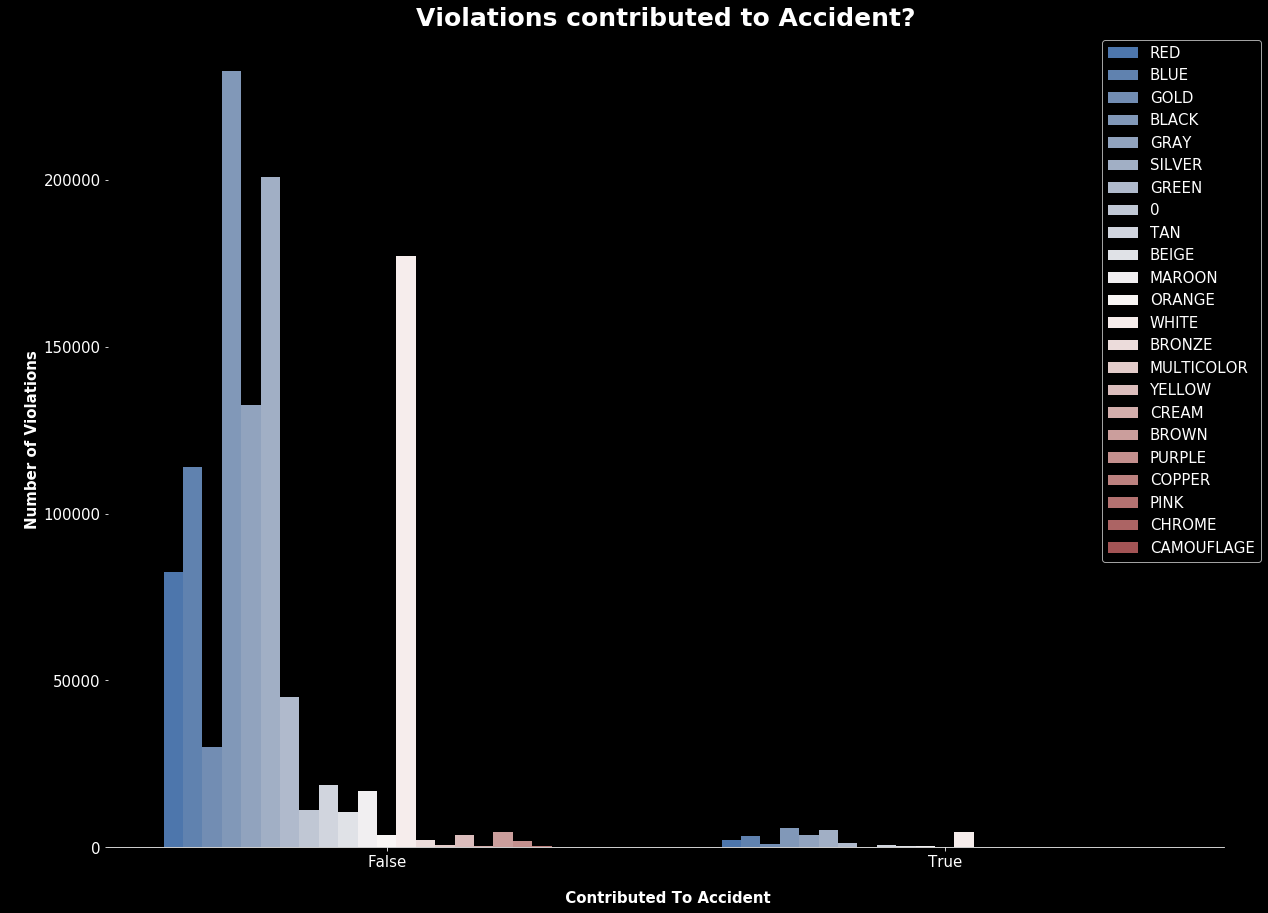

In [23]:
plt.figure(figsize=(20,15))
ax=sns.countplot('ContributedToAccident', hue="Color",
              palette="vlag", data=traffic_new)

plt.style.use('dark_background')
plt.title("Violations contributed to Accident?",fontsize=25,fontweight="bold")
plt.xlabel("\n Contributed To Accident", fontsize=15, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='22', loc = 'upper right')
plt.ylabel("\nNumber of Violations", fontsize=15, fontweight="bold")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize='15', bbox_to_anchor=(1.04, 1), loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=True, bottom=False)
#plt.savefig('Total_Violation_and_type_of_vehicle_involved.jpg')
plt.show()

## Which Race has highest number of violations and is it same for every year?

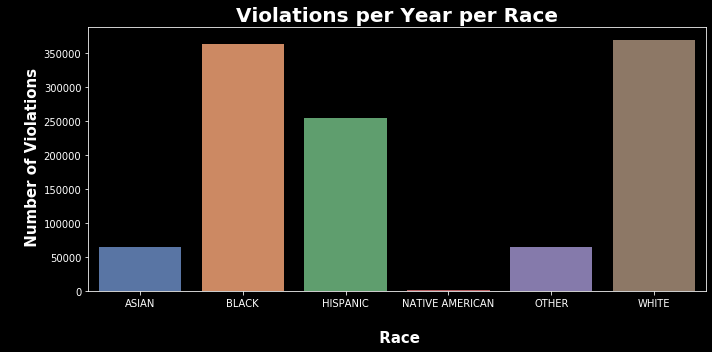

In [24]:
#Race-wise traffic violation
race_violation = traffic_new.groupby(['Race'])['Violation'].count()

# sns barplot
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
colors = sns.color_palette("deep")
sns.barplot(race_violation.index,race_violation.values, palette=colors)
#sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Violations per Year per Race",fontsize=20, fontweight="bold")
plt.xlabel("\n Race", fontsize=15, fontweight="bold")
plt.ylabel("\n Number of Violations", fontsize=15, fontweight="bold")
#plt.savefig('violationperyear.jpg')
plt.tight_layout()

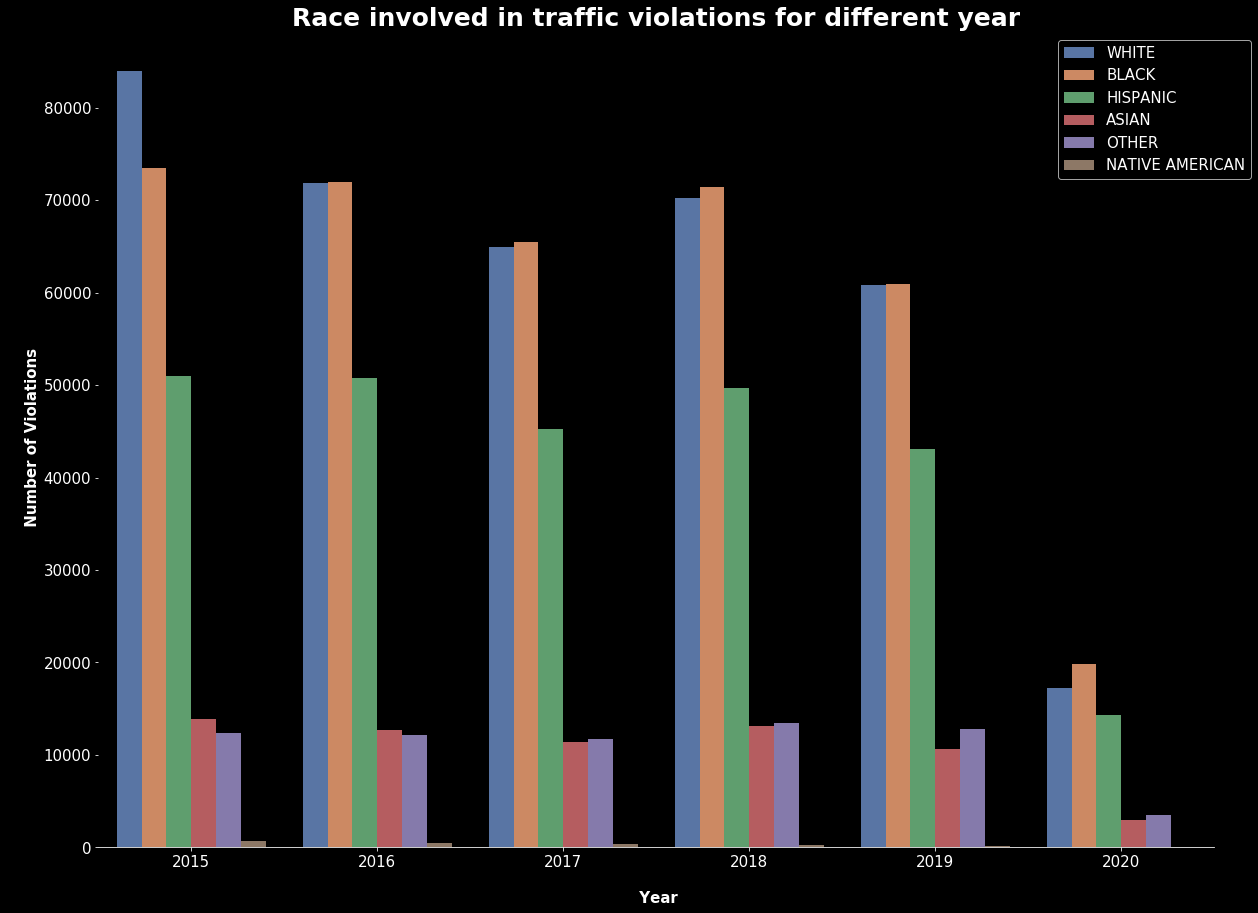

In [25]:
plt.figure(figsize=(20,15))
ax=sns.countplot('year', hue="Race",
              palette="deep", data=traffic_new)

plt.style.use('dark_background')
plt.title("Race involved in traffic violations for different year",fontsize=25,fontweight="bold")
plt.xlabel("\n Year", fontsize=15, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='22', loc = 'upper right')
plt.ylabel("\n Number of Violations", fontsize=15, fontweight="bold")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize='15', bbox_to_anchor=(1.04, 1), loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=True, bottom=False)
#plt.savefig('Total_Violation_and_type_of_vehicle_involved.jpg')
plt.show()

## Further, which race got the most tickets ?

<Figure size 2160x2160 with 0 Axes>

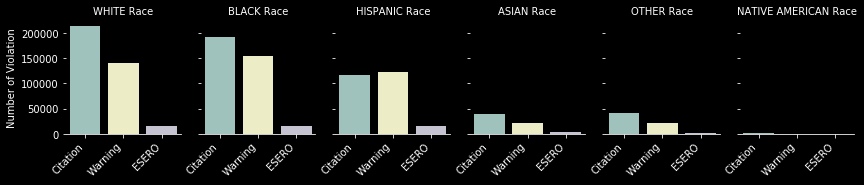

In [26]:
plt.figure(figsize=(30,30))
g = sns.catplot(x="ViolationType", col="Race", 
                data=traffic_new, saturation=.5,
                kind="count", height=2.5, aspect=.8)
(g.set_axis_labels("", "Number of Violation")
  .set_xticklabels(["Citation", "Warning", "ESERO"], rotation=45, 
    horizontalalignment='right')
  .set_titles("{col_name} {col_var}")
  .despine(left=True)
  )  

## How does number of violations change over year and month? Which month has the highest number of violation? Is it same for every year?

(<seaborn.axisgrid.FacetGrid at 0x15bb8382c48>,)

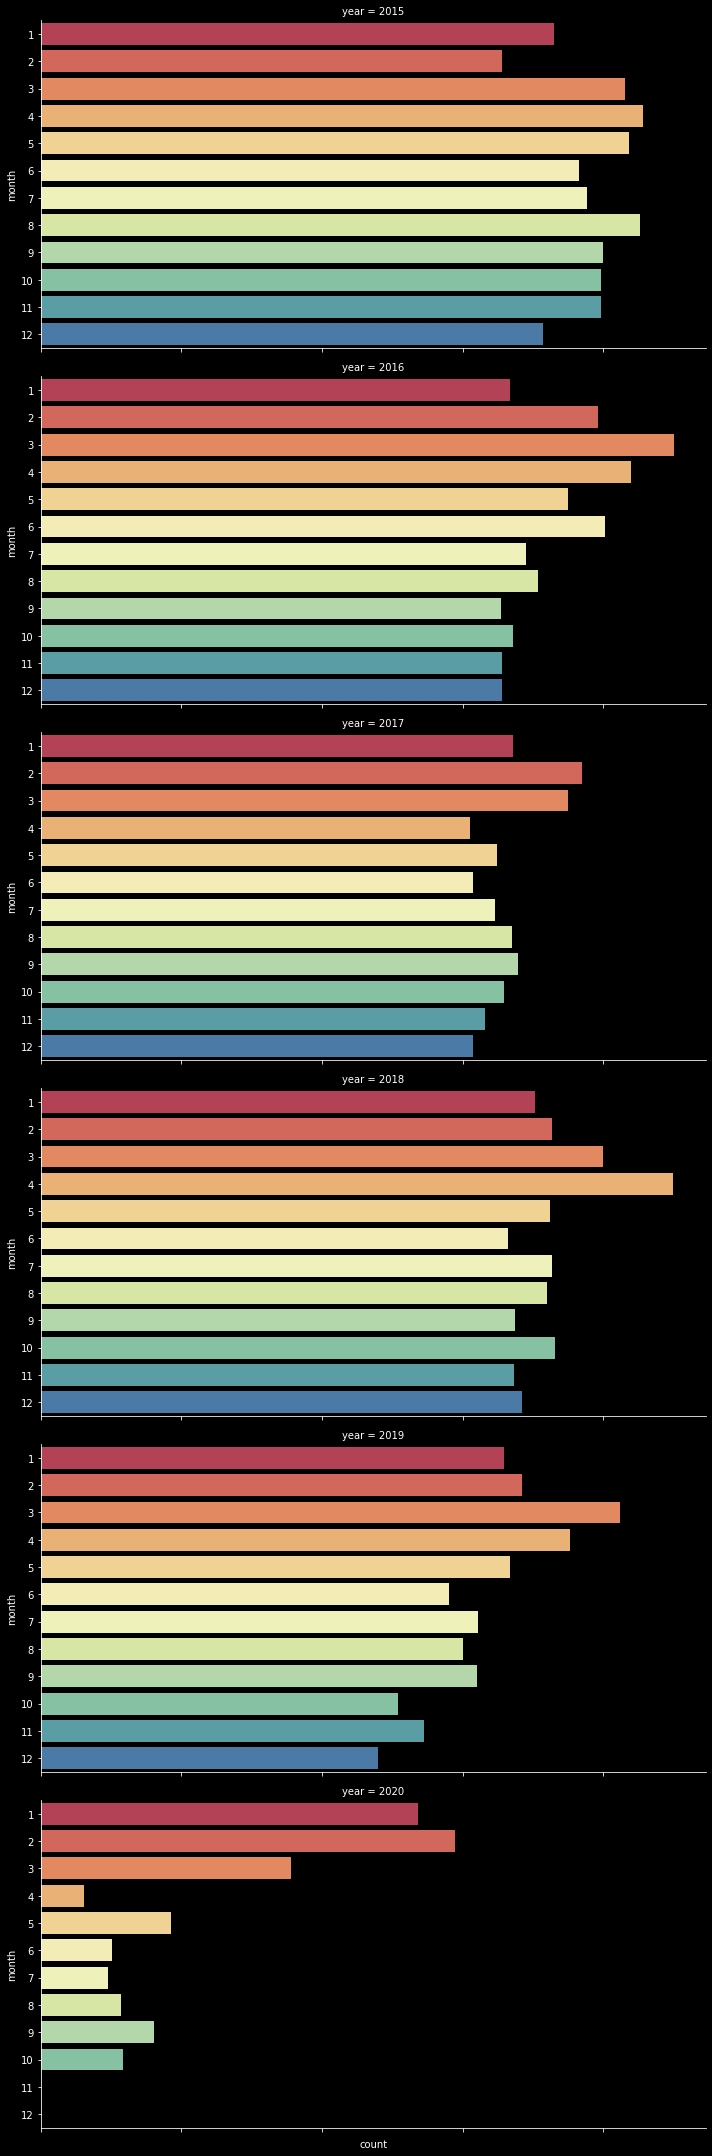

In [27]:
voiolation_year = sns.catplot(
    data=traffic_new[traffic_new['year'].isin([2020,2019,2018,2017,2016,2015])],
    y='month',
    kind='count',
    #hue ='ViolationType',
    palette='Spectral',
    row='year',
    aspect=2,
    #height=3
)
(voiolation_year.set_xticklabels(rotation=65, horizontalalignment='right'),
)

## Statistics regarding Violations 

In [28]:
def compute_violation_stats(df2):
    """Compute statistics regarding Violations"""
    n_total = len(df2)
    n_alcohol = len(df2[df2['Alcohol'] == 1])
    n_belts = len(df2[df2['Belts']  == 0])
    n_Accident = len(df2[df2['Accident']  == 1]) 
    n_Personal_Injury = len(df2[df2['PersonalInjury']  == 1]) 
    n_Property_Damage = len(df2[df2['PropertyDamage']  == 1]) 
    n_Fatal = len(df2[df2['Fatal']  == 1]) 
    n_Work_Zone = len(df2[df2['WorkZone']  == 1]) 
    return(pd.Series(data = { 
        'n_total': n_total,
        'DUI': n_alcohol,
        'n_belts': n_belts,
        'n_Accident' :n_Accident,
        'n_Personal Injury' : n_Personal_Injury,
        'n_Property Damage' :  n_Property_Damage, 
        'n_Fatal' : n_Fatal,
        'n_WorkZone' : n_Work_Zone
        
    }))

Here Belts =yes means driver was using belt in accident cases.

In [29]:
compute_violation_stats(traffic_new).astype(int)

n_total              1119076
DUI                     1059
n_belts              1089118
n_Accident             29186
n_Personal Injury      13000
n_Property Damage      22723
n_Fatal                  269
n_WorkZone               288
dtype: int32

## The total number of violations for not using seat belts in accident cases

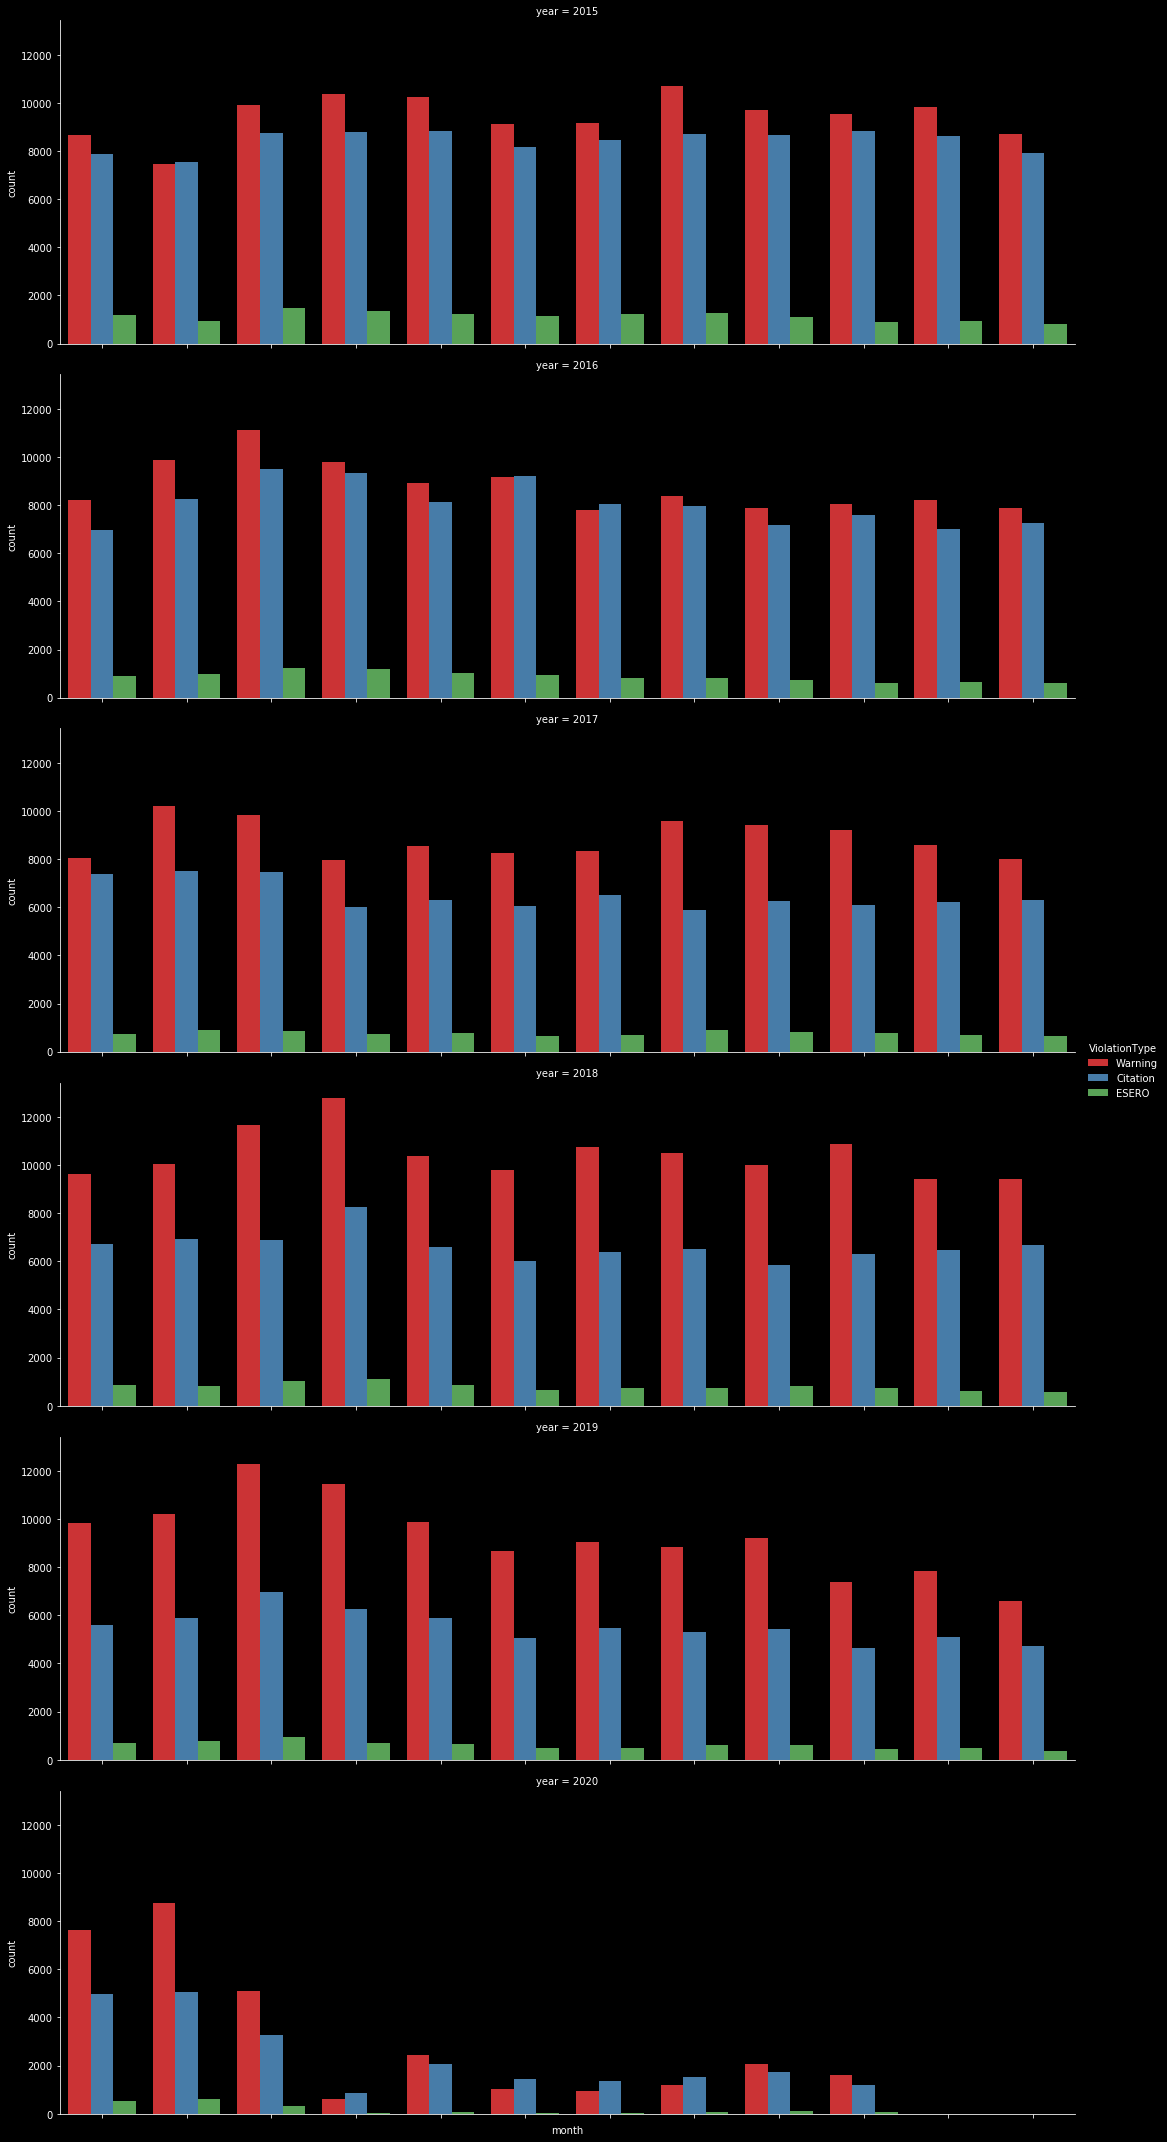

In [30]:
#violations = ['Accident','Belts','PersonalInjury','PropertyDamage','Fatal','CommercialLicense','HAZMAT', 'Alcohol', 'WorkZone']
thisyear_violation = traffic_new 
filt = (thisyear_violation ['Belts']!= 1 )
thisyear_violation = thisyear_violation.loc[filt]

voiolation_year = sns.catplot(
    data=thisyear_violation[thisyear_violation['year'].isin([2020,2019,2018,2017,2016,2015])],
    x='month',
    hue='ViolationType',
    kind='count',
    palette='Set1',
    row='year',
    aspect=3,
    #height=3
)
(voiolation_year.set_xticklabels(rotation=65, horizontalalignment='right'),
)
plt.savefig('violation_belt.jpg')

In [31]:
## State issuing the Driver’s License.

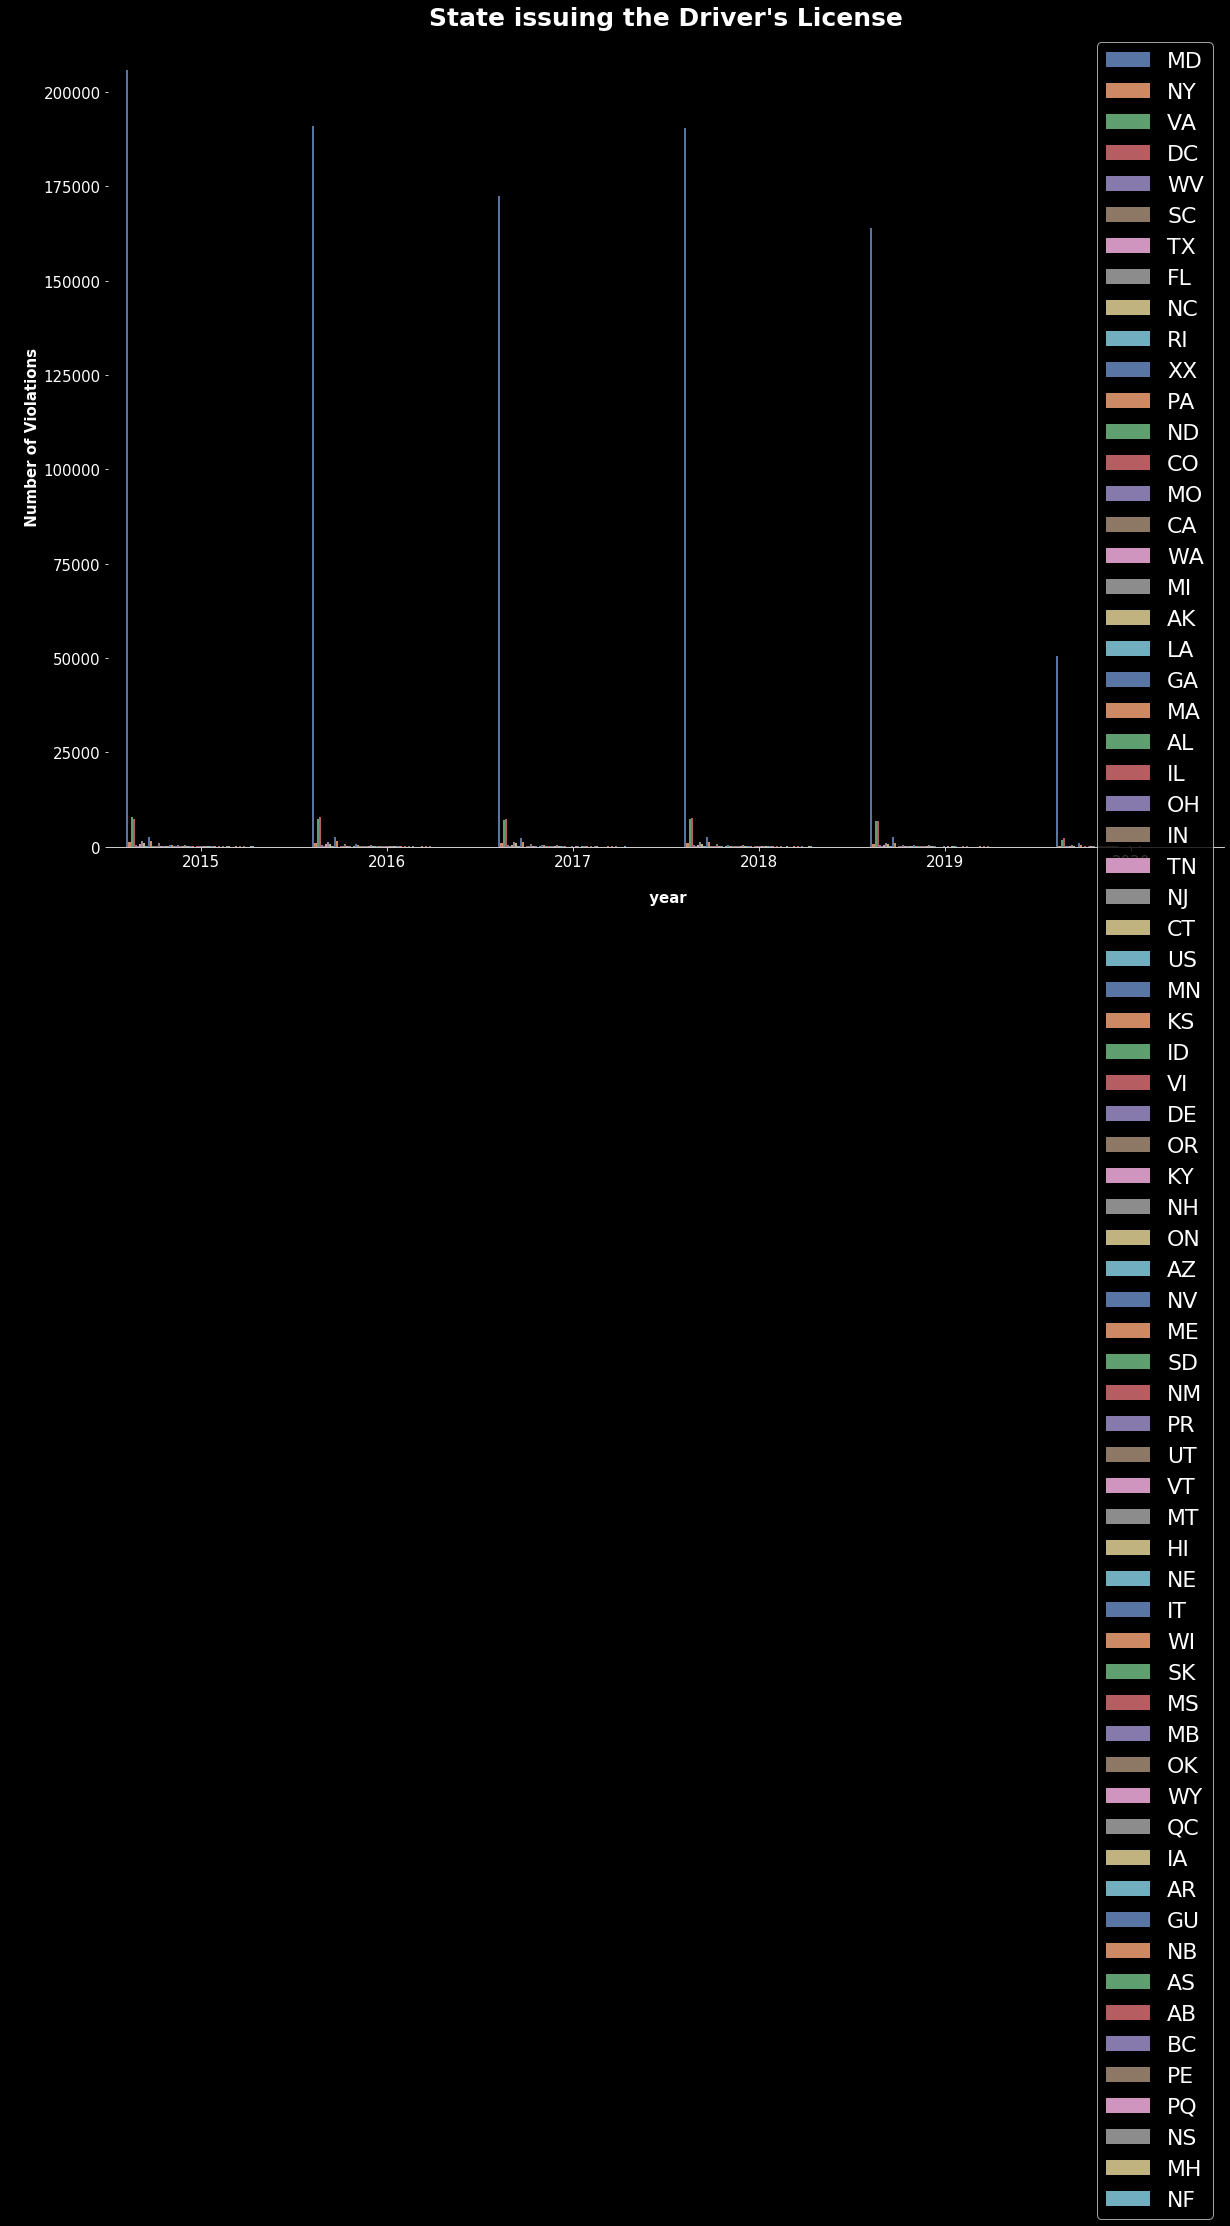

In [32]:
plt.figure(figsize=(20,15))
ax=sns.countplot('year', hue="DLState",
              palette="deep", data=traffic_new)

plt.style.use('dark_background')
plt.title("State issuing the Driver's License",fontsize=25,fontweight="bold")
plt.xlabel("\n year", fontsize=15, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='22', loc = 'upper right')
plt.ylabel("\n Number of Violations", fontsize=15, fontweight="bold")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.legend(fontsize='15', bbox_to_anchor=(1.04, 1), loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=True, bottom=False)
#plt.savefig('Total_Violation_and_type_of_vehicle_involved.jpg')
plt.show()

### How does the distribution of traffic violation in different districts change from 2015 to 2020? 

Text(0.5, 0.98, 'Categorical  by Year and District Number')

<Figure size 1080x720 with 0 Axes>

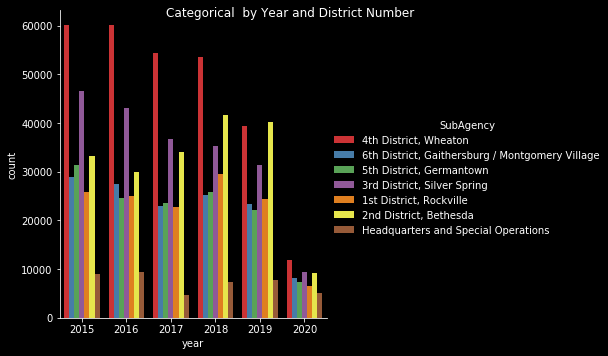

In [33]:
# Barplot with kind=Counts using Seaborn catplot
#plt.figure(figsize=(20,15))
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(15, 10)
viol_district = sns.catplot(x="year", kind="count", hue="SubAgency", palette="Set1", data=traffic_new)
viol_district.fig.suptitle('Categorical  by Year and District Number')

If we notice the number of traffic violation in different district, Wheaton has the highest violation from 2015-2020. 

In [34]:
#plt.figure(figsize=(20,5))
#sns.boxplot(
#    data=traffic_new,
#    x='SubAgency',
#    color='red')

# 2. Crash Reporting Incidents Data <a class="anchor" id="sec4"></a> 

 ## Reading "Crash Reporting Incidents Data" <a class="anchor" id="subsec_4_1"></a>  

In [35]:
    # Reading csv file
    #CRI= pd.read_csv("Crash_Reporting_-_Incidents_Data.csv")
    
    ## Downloading & Reading csv file from website
    url_CRI = 'https://data.montgomerycountymd.gov/api/views/bhju-22kf/rows.csv?accessType=DOWNLOAD'
    CRI = pd.read_csv(url_CRI,low_memory=False)

In [36]:
"""" UseFeatues() Function when called, returns a dataframe with additional features"""

def useFeatures(CRI):

    ## Formatting the Date
    
    # Confirm the date column is in datetime format
    CRI['Crash Date/Time'] = pd.to_datetime(CRI['Crash Date/Time'])
   
    # creating  new columns: date, year, month, day, time 
    CRI['date'] = pd.to_datetime(CRI['Crash Date/Time'])
    CRI['year'] = CRI['Crash Date/Time'].dt.year
    CRI['month'] = CRI['Crash Date/Time'].dt.month
    CRI['time'] = CRI['Crash Date/Time'].dt.time
    CRI['hour'] = CRI['Crash Date/Time'].dt.hour
    CRI['day'] = CRI['Crash Date/Time'].dt.weekday_name
    
    CRI = CRI.sort_values(by='date')
    

    
    ## Filtering the Desired Date Range - 2015 to 2020 ##
    CRI = CRI[CRI.date >='01/01/2017']
    CRI = CRI[CRI.date <'10/23/2020']
    CRI = CRI.reset_index(drop=True)
    
    CRI['season']= "Fall"
    CRI.loc[(CRI['month'] < 3) | (CRI['month'] >= 12), "season"] = 'Winter'
    CRI.loc[(CRI['month'] < 6) & (CRI['month'] >= 3), "season"] = 'Spring'
    CRI.loc[(CRI['month'] < 9) & (CRI['month'] >= 6), "season"] = 'Summer'
    
    ## Hour status
    ##traffic["hourStatus"] = "Evening"
    ## traffic.loc[( traffic["hour"] < 18) & ( traffic["wdayStatus"] == "Weekday"), "hourStatus"]="WorkHour"
    
    #Creating a new column to count the total number of violation
    CRI['crash'] = pd.Series(1, index=CRI.index)
    
    return CRI

In [37]:
# All the above features are stored in new data frame "CRI_features"
CRI_features = useFeatures(CRI)

In [38]:
CRI_features.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Mile Point Direction,Lane Direction,...,Longitude,Location,date,year,month,time,hour,day,season,crash
0,DM83880018,17000002,Takoma Park Police Depart,Property Damage Crash,2017-01-01 00:00:00,No,Maryland (State),6.70,East,East,...,-76.985621,"(38.98738452, -76.98562145)",2017-01-01 00:00:00,2017,1,00:00:00,0,Sunday,Winter,1
1,HA24160006,17000001,Maryland-National Capital,Injury Crash,2017-01-01 00:49:00,Yes,Government,1.53,West,West,...,-77.013004,"(39.00253552, -77.01300412)",2017-01-01 00:49:00,2017,1,00:49:00,0,Sunday,Winter,1
2,MCP2900001Z,17000018,Montgomery County Police,Property Damage Crash,2017-01-01 01:16:00,No,County,1.42,South,West,...,-77.151880,"(39.14102, -77.15188)",2017-01-01 01:16:00,2017,1,01:16:00,1,Sunday,Winter,1
3,MCP29500017,17000020,Montgomery County Police,Property Damage Crash,2017-01-01 01:30:00,No,NaN,NaN,NaN,NaN,...,-77.234480,"(39.17991167, -77.23448)",2017-01-01 01:30:00,2017,1,01:30:00,1,Sunday,Winter,1
4,MCP2771000T,17000028,Montgomery County Police,Property Damage Crash,2017-01-01 02:18:00,No,Maryland (State),15.43,North,South,...,-77.212322,"(39.15262419, -77.21232176)",2017-01-01 02:18:00,2017,1,02:18:00,2,Sunday,Winter,1


In [39]:
## Replace white space everywhere
CRI_features.columns =CRI_features.columns.str.replace(' ', '')

In [40]:
CRI_features.columns

Index(['ReportNumber', 'LocalCaseNumber', 'AgencyName', 'ACRSReportType',
       'CrashDate/Time', 'Hit/Run', 'RouteType', 'MilePoint',
       'MilePointDirection', 'LaneDirection', 'LaneNumber', 'LaneType',
       'NumberofLanes', 'Direction', 'Distance', 'DistanceUnit', 'RoadGrade',
       'NonTraffic', 'RoadName', 'Cross-StreetType', 'Cross-StreetName',
       'Off-RoadDescription', 'Municipality', 'RelatedNon-Motorist', 'AtFault',
       'CollisionType', 'Weather', 'SurfaceCondition', 'Light',
       'TrafficControl', 'DriverSubstanceAbuse', 'Non-MotoristSubstanceAbuse',
       'FirstHarmfulEvent', 'SecondHarmfulEvent', 'FixedOjectStruck',
       'Junction', 'IntersectionType', 'IntersectionArea', 'RoadAlignment',
       'RoadCondition', 'RoadDivision', 'Latitude', 'Longitude', 'Location',
       'date', 'year', 'month', 'time', 'hour', 'day', 'season', 'crash'],
      dtype='object')

Text(0.5, 0.9, 'Missing values By Variable')

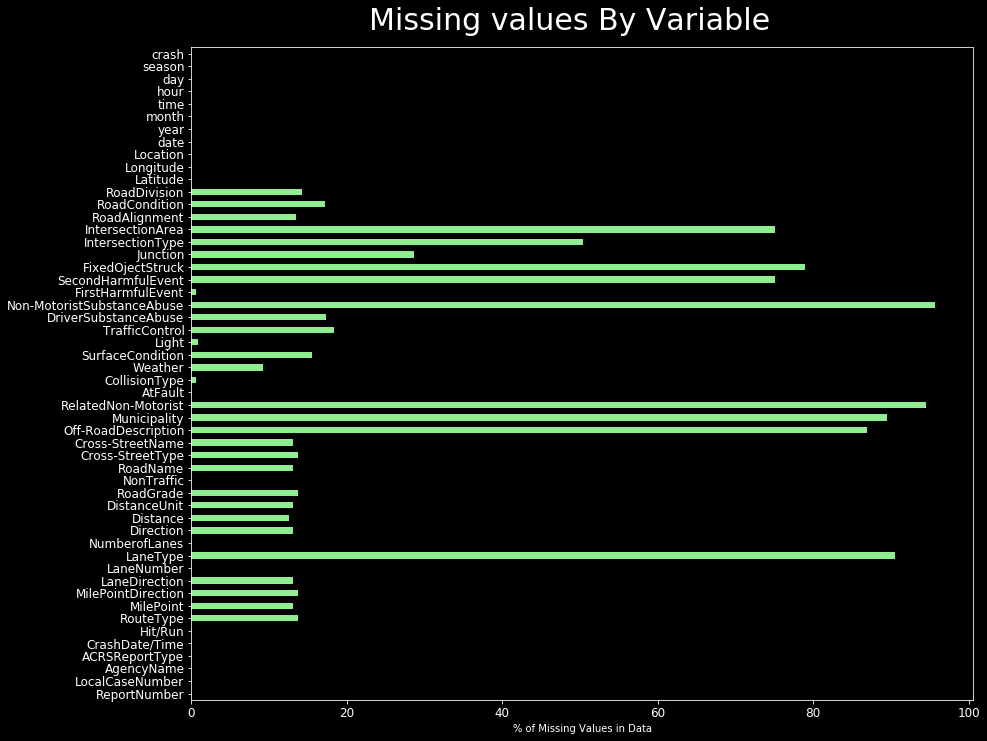

In [41]:
    missing_var = 100*CRI_features.isnull().sum()/CRI_features.shape[0]
    missing_var.sort_values()
   # print(100*traffic_features.isnull().sum()/traffic_features.shape[0]) #missing_var2.index
    plot = missing_var.plot(kind='barh',figsize=(14,12), grid = False,label="Percentage",color='lightgreen',fontsize=12)
    plot.set_xlabel("% of Missing Values in Data")
    plt.figtext(.5,0.9,'Missing values By Variable',fontsize=30,ha='center')

### Renaming & Replace

> The column name *Agency name* is changed *Agency* and "Montgomery County Police" is changed to "MCP" as in traffic violation data.

In [42]:
 # Replace all NaN's by 0
CRI_new = CRI_features.fillna(0)

#Renaming the column and replacing 
CRI_new = CRI_new.rename(columns={"AgencyName": "Agency"})
CRI_new = CRI_new.replace({'Agency' : {'Montgomery County Police' : 'MCP', 'Rockville Police Departme' : 'RPD'}})
CRI_new.head()

,ReportNumber,LocalCaseNumber,Agency,ACRSReportType,CrashDate/Time,Hit/Run,RouteType,MilePoint,MilePointDirection,LaneDirection,...,Longitude,Location,date,year,month,time,hour,day,season,crash
0,DM83880018,17000002,Takoma Park Police Depart,Property Damage Crash,2017-01-01 00:00:00,No,Maryland (State),6.70,East,East,...,-76.985621,"(38.98738452, -76.98562145)",2017-01-01 00:00:00,2017,1,00:00:00,0,Sunday,Winter,1
1,HA24160006,17000001,Maryland-National Capital,Injury Crash,2017-01-01 00:49:00,Yes,Government,1.53,West,West,...,-77.013004,"(39.00253552, -77.01300412)",2017-01-01 00:49:00,2017,1,00:49:00,0,Sunday,Winter,1
2,MCP2900001Z,17000018,MCP,Property Damage Crash,2017-01-01 01:16:00,No,County,1.42,South,West,...,-77.151880,"(39.14102, -77.15188)",2017-01-01 01:16:00,2017,1,01:16:00,1,Sunday,Winter,1
3,MCP29500017,17000020,MCP,Property Damage Crash,2017-01-01 01:30:00,No,0,0.00,0,0,...,-77.234480,"(39.17991167, -77.23448)",2017-01-01 01:30:00,2017,1,01:30:00,1,Sunday,Winter,1
4,MCP2771000T,17000028,MCP,Property Damage Crash,2017-01-01 02:18:00,No,Maryland (State),15.43,North,South,...,-77.212322,"(39.15262419, -77.21232176)",2017-01-01 02:18:00,2017,1,02:18:00,2,Sunday,Winter,1


In [43]:
print("Size of the data frame : ", CRI_new.shape)
#info() is used to check the Information about the data and the datatypes of each respective attribute.
print("Summary of columns ", CRI_new.info(verbose = False))
#This code prints a summary of columns count and its dtypes but not per column information.
print("\n\nThe column names in the dataframe \n\n :", CRI_new.columns)

Size of the data frame :  (41949, 52)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41949 entries, 0 to 41948
Columns: 52 entries, ReportNumber to crash
dtypes: datetime64[ns](2), float64(4), int64(6), object(40)
memory usage: 16.6+ MB
Summary of columns  None


The column names in the dataframe 

 : Index(['ReportNumber', 'LocalCaseNumber', 'Agency', 'ACRSReportType',
       'CrashDate/Time', 'Hit/Run', 'RouteType', 'MilePoint',
       'MilePointDirection', 'LaneDirection', 'LaneNumber', 'LaneType',
       'NumberofLanes', 'Direction', 'Distance', 'DistanceUnit', 'RoadGrade',
       'NonTraffic', 'RoadName', 'Cross-StreetType', 'Cross-StreetName',
       'Off-RoadDescription', 'Municipality', 'RelatedNon-Motorist', 'AtFault',
       'CollisionType', 'Weather', 'SurfaceCondition', 'Light',
       'TrafficControl', 'DriverSubstanceAbuse', 'Non-MotoristSubstanceAbuse',
       'FirstHarmfulEvent', 'SecondHarmfulEvent', 'FixedOjectStruck',
       'Junction', 'IntersectionType', 'Inters

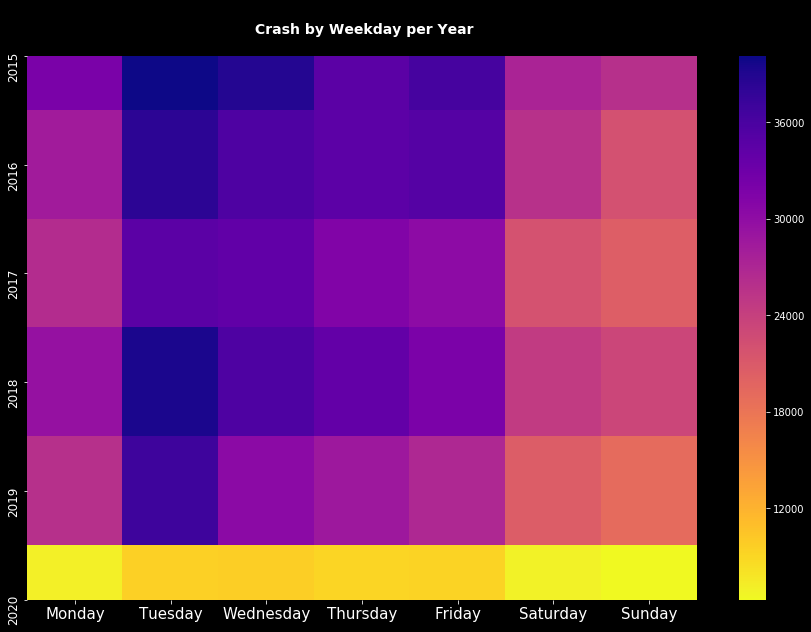

In [44]:
crashweekday = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
crash_weekday = CRI_new.groupby(['year', 'day']).size()
#Reshape using unstack() function in Pandas python: 
crash_weekday = crash_weekday.rename_axis(['year', 'day'])\
                               .unstack('day')\
                               .reindex(columns=crashweekday)
plt.figure(figsize=(15,10))
plt.style.use('dark_background')
sns.heatmap(violationweekday, cmap='plasma_r')
plt.title('\n Crash by Weekday per Year\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
#plt.savefig('crashbyweekdayperyear.jpg')
plt.show()

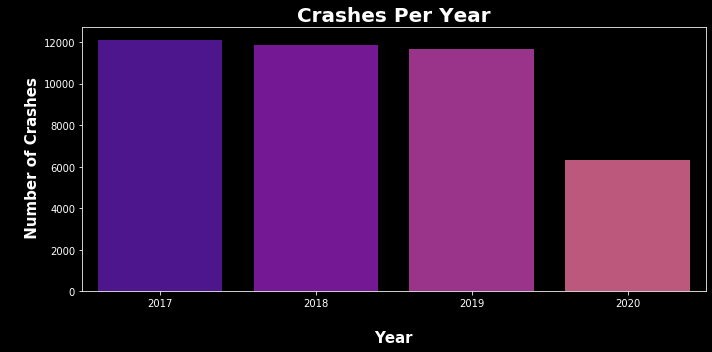

In [45]:
crashperyear = CRI_new.groupby(['year'])['crash'].count()

# sns barplot
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
colors = sns.color_palette("plasma", n_colors=7)
sns.barplot(crashperyear.index,crashperyear.values, palette=colors)
#sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Crashes Per Year",fontsize=20, fontweight="bold")
plt.xlabel("\nYear", fontsize=15, fontweight="bold")
plt.ylabel("\n Number of Crashes", fontsize=15, fontweight="bold")
#plt.savefig('violationperyear.jpg')
plt.tight_layout()

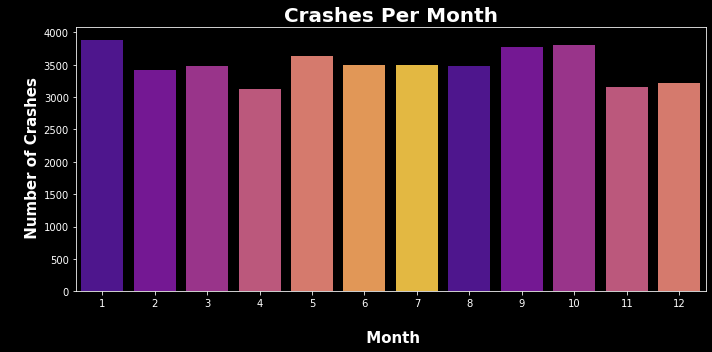

In [46]:
crashpermonth = CRI_new.groupby(['month'])['crash'].count()

# sns barplot
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
colors = sns.color_palette("plasma", n_colors=7)
sns.barplot(crashpermonth .index,crashpermonth .values, palette=colors)
#sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Crashes Per Month",fontsize=20, fontweight="bold")
plt.xlabel("\n Month", fontsize=15, fontweight="bold")
plt.ylabel("\n Number of Crashes", fontsize=15, fontweight="bold")
#plt.savefig('violationperyear.jpg')
plt.tight_layout()

Text(0.5, 0.98, 'Crashes by Year and Weather Condition')

<Figure size 1080x720 with 0 Axes>

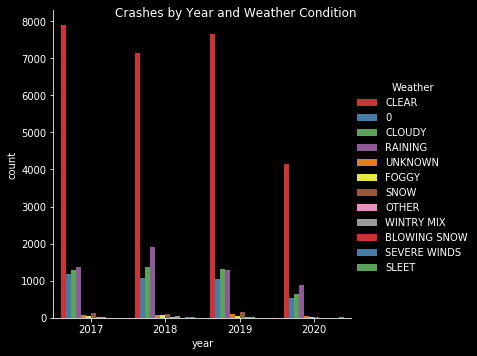

In [47]:
# Barplot with kind=Counts using Seaborn catplot
#plt.figure(figsize=(20,15))
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(15, 10)
crash_weather = sns.catplot(x="year", kind="count", hue="Weather", palette="Set1", data=CRI_new)
crash_weather.fig.suptitle('Crashes by Year and Weather Condition')

Most of the crashes happened during clear weather and hishest crashes occured in the year 2017

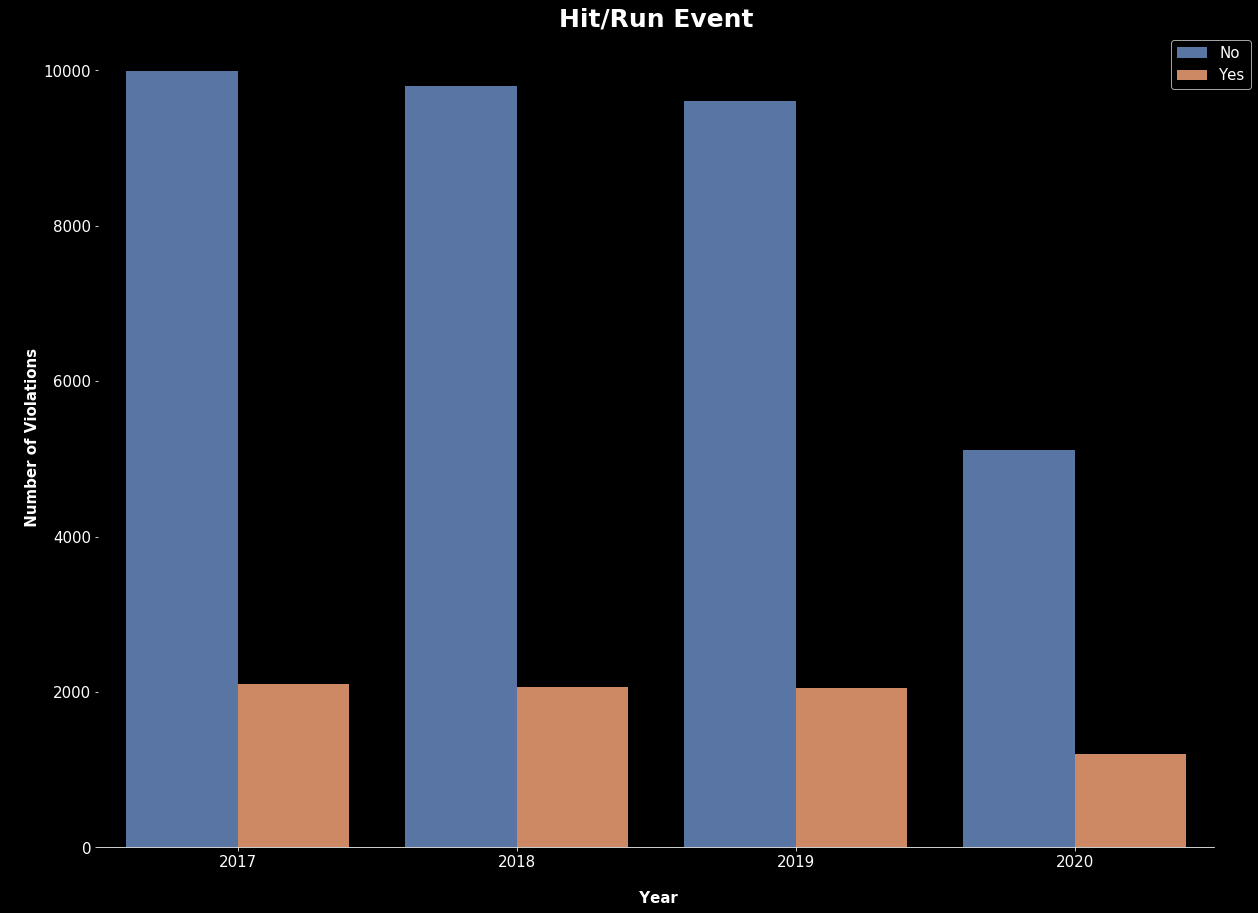

In [48]:
plt.figure(figsize=(20,15))
ax=sns.countplot('year', hue="Hit/Run",
              palette="deep", data=CRI_new)

plt.style.use('dark_background')
plt.title("Hit/Run Event",fontsize=25,fontweight="bold")
plt.xlabel("\n Year", fontsize=15, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='22', loc = 'upper right')
plt.ylabel("\n Number of Violations", fontsize=15, fontweight="bold")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize='15', bbox_to_anchor=(1.04, 1), loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=True, bottom=False)
#plt.savefig('Total_Violation_and_type_of_vehicle_involved.jpg')
plt.show()

# 3. Crash Reporting – Non-Motorists Data <a class="anchor" id="sec5"></a> 

## Reading "Crash Reporting - Non-Motorists Data"  <a class="anchor" id="subsec_5_1"></a>  

In [49]:
    # Reading csv file
    #CRI= pd.read_csv("Crash_Reporting_-_Non-Motorists_Data.csv")
    
    ## Downloading & Reading csv file from website
    url_CRNM = 'https://data.montgomerycountymd.gov/api/views/n7fk-dce5/rows.csv?accessType=DOWNLOAD'
    CRNM = pd.read_csv(url_CRNM,low_memory=False)

In [50]:
"""" UseFeatues() Function when called, returns a dataframe with additional features"""

def useFeatures(CRNM):

    ## Formatting the Date
    
    # Confirm the date column is in datetime format
    CRNM['Crash Date/Time'] = pd.to_datetime(CRNM['Crash Date/Time'])
   
    # creating  new columns: date, year, month, day, time 
    CRNM['date'] = pd.to_datetime(CRNM['Crash Date/Time'])
    CRNM['year'] = CRNM['Crash Date/Time'].dt.year
    CRNM['month'] = CRNM['Crash Date/Time'].dt.month
    CRNM['time'] = CRNM['Crash Date/Time'].dt.time
    CRNM['hour'] = CRNM['Crash Date/Time'].dt.hour
    CRNM['day'] = CRNM['Crash Date/Time'].dt.weekday_name
    
    CRNM = CRNM.sort_values(by='date')
    

    
    ## Filtering the Desired Date Range - 2015 to 2020 ##
    CRNM = CRNM[CRNM.date >='01/01/2017']
    CRNM = CRNM[CRNM.date <'10/23/2020']
    CRNM = CRNM.reset_index(drop=True)
    
    CRNM['season']= "Fall"
    CRNM.loc[(CRI['month'] < 3) | (CRNM['month'] >= 12), "season"] = 'Winter'
    CRNM.loc[(CRI['month'] < 6) & (CRNM['month'] >= 3), "season"] = 'Spring'
    CRNM.loc[(CRI['month'] < 9) & (CRNM['month'] >= 6), "season"] = 'Summer'
    
    ## Hour status
    ##traffic["hourStatus"] = "Evening"
    ## traffic.loc[( traffic["hour"] < 18) & ( traffic["wdayStatus"] == "Weekday"), "hourStatus"]="WorkHour"
    
    #Creating a new column to count the total number of violation
    CRNM['crash'] = pd.Series(1, index=CRNM.index)
    
    return CRNM

In [51]:
# All the above features are stored in new data frame "CRI_features"
CRNM_features = useFeatures(CRNM)

In [52]:
CRNM_features.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Longitude,Location,date,year,month,time,hour,day,season,crash
0,MCP2712001F,17000094,Montgomery County Police,Injury Crash,2017-01-01 12:02:00,Maryland (State),NEW HAMPSHIRE AVE,Unknown,ENT TO WHITE OAK SHOPPING CENTER,NaN,...,-76.990993,"(39.04091754, -76.99099258)",2017-01-01 12:02:00,2017,1,12:02:00,12,Sunday,Fall,1
1,DD56100029,17000269,Rockville Police Departme,Injury Crash,2017-01-02 18:02:00,Municipality,BROADWOOD DR,Maryland (State),VEIRS MILL RD,NaN,...,-77.123987,"(39.077227, -77.1239875)",2017-01-02 18:02:00,2017,1,18:02:00,18,Monday,Fall,1
2,MCP02510014,17000280,Montgomery County Police,Injury Crash,2017-01-02 18:53:00,NaN,NaN,NaN,NaN,PARKING LOT OF 12001 BIRDSEYE TERR,...,-77.249343,"(39.16370333, -77.24934333)",2017-01-02 18:53:00,2017,1,18:53:00,18,Monday,Fall,1
3,MCP21070011,17000332,Montgomery County Police,Injury Crash,2017-01-03 07:32:00,Maryland (State),CLOPPER RD,County,CINNAMON DR,NaN,...,-77.264519,"(39.15610804, -77.26451889)",2017-01-03 07:32:00,2017,1,07:32:00,7,Tuesday,Fall,1
4,DD5614001T,17000330,Rockville Police Departme,Injury Crash,2017-01-03 07:35:00,Municipality,WOOTTON PKWY,Other Public Roadway,PAULSBORO DR,NaN,...,-77.182173,"(39.07759833, -77.18217333)",2017-01-03 07:35:00,2017,1,07:35:00,7,Tuesday,Fall,1


In [53]:
## Replace white space everywhere
CRNM_features.columns =CRNM_features.columns.str.replace(' ', '')

In [54]:
CRNM_features.columns

Index(['ReportNumber', 'LocalCaseNumber', 'AgencyName', 'ACRSReportType',
       'CrashDate/Time', 'RouteType', 'RoadName', 'Cross-StreetType',
       'Cross-StreetName', 'Off-RoadDescription', 'Municipality',
       'RelatedNon-Motorist', 'CollisionType', 'Weather', 'SurfaceCondition',
       'Light', 'TrafficControl', 'DriverSubstanceAbuse',
       'Non-MotoristSubstanceAbuse', 'PersonID', 'PedestrianType',
       'PedestrianMovement', 'PedestrianActions', 'PedestrianLocation',
       'PedestrianObeyedTrafficSignal', 'PedestrianVisibility', 'AtFault',
       'InjurySeverity', 'SafetyEquipment', 'Latitude', 'Longitude',
       'Location', 'date', 'year', 'month', 'time', 'hour', 'day', 'season',
       'crash'],
      dtype='object')

Text(0.5, 0.9, 'Missing values By Variable')

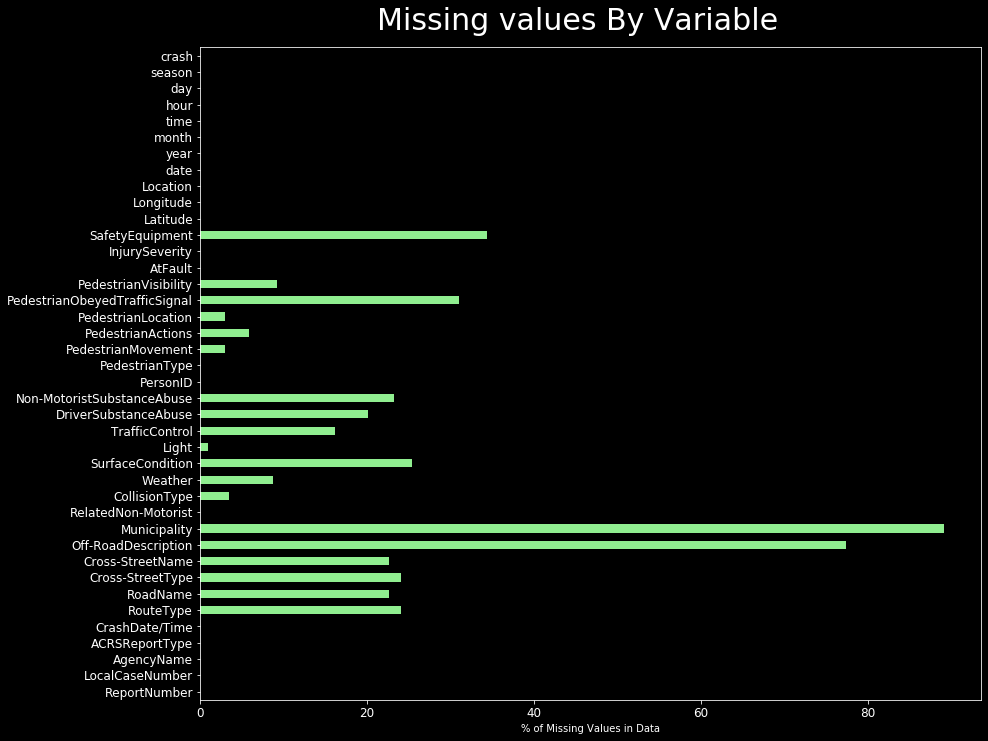

In [55]:
    missing_var = 100*CRNM_features.isnull().sum()/CRNM_features.shape[0]
    missing_var.sort_values()
   # print(100*traffic_features.isnull().sum()/traffic_features.shape[0]) #missing_var2.index
    plot = missing_var.plot(kind='barh',figsize=(14,12), grid = False,label="Percentage",color='lightgreen',fontsize=12)
    plot.set_xlabel("% of Missing Values in Data")
    plt.figtext(.5,0.9,'Missing values By Variable',fontsize=30,ha='center')

### Renaming & Replace

> The column name *Agency name* is changed *Agency* and "Montgomery County Police" is changed to "MCP" as in traffic violation data.

In [56]:
 # Replace all NaN's by 0
CRNM_new = CRNM_features.fillna(0)

#Renaming the column and replacing 
CRNM_new = CRNM_new.rename(columns={"AgencyName": "Agency"})
CRNM_new = CRNM_new.replace({'Agency' : {'Montgomery County Police' : 'MCP', 'Rockville Police Departme' : 'RPD'}})
CRNM_new.head()

,ReportNumber,LocalCaseNumber,Agency,ACRSReportType,CrashDate/Time,RouteType,RoadName,Cross-StreetType,Cross-StreetName,Off-RoadDescription,...,Longitude,Location,date,year,month,time,hour,day,season,crash
0,MCP2712001F,17000094,MCP,Injury Crash,2017-01-01 12:02:00,Maryland (State),NEW HAMPSHIRE AVE,Unknown,ENT TO WHITE OAK SHOPPING CENTER,0,...,-76.990993,"(39.04091754, -76.99099258)",2017-01-01 12:02:00,2017,1,12:02:00,12,Sunday,Fall,1
1,DD56100029,17000269,RPD,Injury Crash,2017-01-02 18:02:00,Municipality,BROADWOOD DR,Maryland (State),VEIRS MILL RD,0,...,-77.123987,"(39.077227, -77.1239875)",2017-01-02 18:02:00,2017,1,18:02:00,18,Monday,Fall,1
2,MCP02510014,17000280,MCP,Injury Crash,2017-01-02 18:53:00,0,0,0,0,PARKING LOT OF 12001 BIRDSEYE TERR,...,-77.249343,"(39.16370333, -77.24934333)",2017-01-02 18:53:00,2017,1,18:53:00,18,Monday,Fall,1
3,MCP21070011,17000332,MCP,Injury Crash,2017-01-03 07:32:00,Maryland (State),CLOPPER RD,County,CINNAMON DR,0,...,-77.264519,"(39.15610804, -77.26451889)",2017-01-03 07:32:00,2017,1,07:32:00,7,Tuesday,Fall,1
4,DD5614001T,17000330,RPD,Injury Crash,2017-01-03 07:35:00,Municipality,WOOTTON PKWY,Other Public Roadway,PAULSBORO DR,0,...,-77.182173,"(39.07759833, -77.18217333)",2017-01-03 07:35:00,2017,1,07:35:00,7,Tuesday,Fall,1


In [57]:
print("Size of the data frame : ", CRNM_new.shape)
#info() is used to check the Information about the data and the datatypes of each respective attribute.
print("Summary of columns ", CRNM_new.info(verbose = False))
#This code prints a summary of columns count and its dtypes but not per column information.
print("\n\nThe column names in the dataframe \n\n :", CRNM_new.columns)

Size of the data frame :  (2433, 40)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2433 entries, 0 to 2432
Columns: 40 entries, ReportNumber to crash
dtypes: datetime64[ns](2), float64(2), int64(5), object(31)
memory usage: 760.4+ KB
Summary of columns  None


The column names in the dataframe 

 : Index(['ReportNumber', 'LocalCaseNumber', 'Agency', 'ACRSReportType',
       'CrashDate/Time', 'RouteType', 'RoadName', 'Cross-StreetType',
       'Cross-StreetName', 'Off-RoadDescription', 'Municipality',
       'RelatedNon-Motorist', 'CollisionType', 'Weather', 'SurfaceCondition',
       'Light', 'TrafficControl', 'DriverSubstanceAbuse',
       'Non-MotoristSubstanceAbuse', 'PersonID', 'PedestrianType',
       'PedestrianMovement', 'PedestrianActions', 'PedestrianLocation',
       'PedestrianObeyedTrafficSignal', 'PedestrianVisibility', 'AtFault',
       'InjurySeverity', 'SafetyEquipment', 'Latitude', 'Longitude',
       'Location', 'date', 'year', 'month', 'time', 'hour', 'day', 'sea

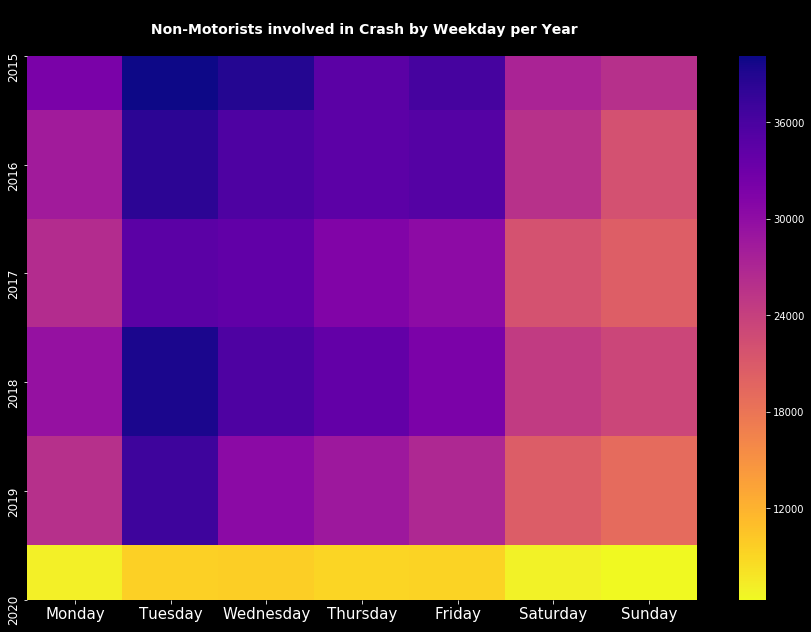

In [58]:
non_motweekday = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
non_mot_weekday = CRNM_new.groupby(['year', 'day']).size()
#Reshape using unstack() function in Pandas python: 
non_mot_weekday = non_mot_weekday.rename_axis(['year', 'day'])\
                               .unstack('day')\
                               .reindex(columns=crashweekday)
plt.figure(figsize=(15,10))
plt.style.use('dark_background')
sns.heatmap(violationweekday, cmap='plasma_r')
plt.title('\n Non-Motorists involved in Crash by Weekday per Year\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
#plt.savefig('crashbyweekdayperyear.jpg')
plt.show()

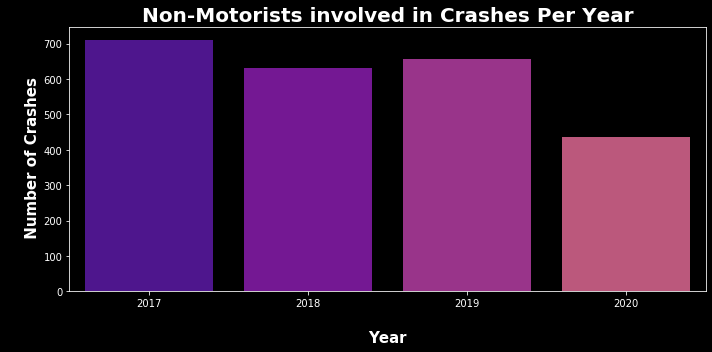

In [59]:
non_mot_peryear = CRNM_new.groupby(['year'])['crash'].count()

# sns barplot
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
colors = sns.color_palette("plasma", n_colors=7)
sns.barplot(non_mot_peryear.index,non_mot_peryear.values, palette=colors)
#sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Non-Motorists involved in Crashes Per Year",fontsize=20, fontweight="bold")
plt.xlabel("\nYear", fontsize=15, fontweight="bold")
plt.ylabel("\n Number of Crashes", fontsize=15, fontweight="bold")
#plt.savefig('violationperyear.jpg')
plt.tight_layout()

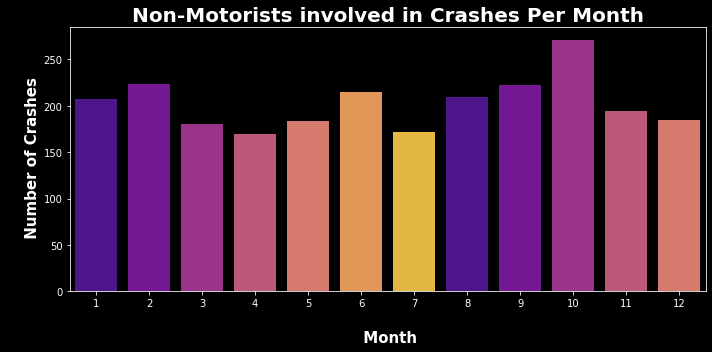

In [60]:
non_mot_permonth = CRNM_new.groupby(['month'])['crash'].count()

# sns barplot
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
colors = sns.color_palette("plasma", n_colors=7)
sns.barplot(non_mot_permonth .index,non_mot_permonth .values, palette=colors)
#sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Non-Motorists involved in Crashes Per Month",fontsize=20, fontweight="bold")
plt.xlabel("\n Month", fontsize=15, fontweight="bold")
plt.ylabel("\n Number of Crashes", fontsize=15, fontweight="bold")
#plt.savefig('violationperyear.jpg')
plt.tight_layout()

Text(0.5, 0.98, 'Non-Motorists involved in CrashesCrashes by Year and Weather Condition')

<Figure size 1080x720 with 0 Axes>

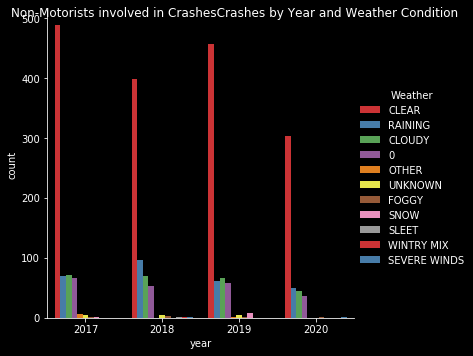

In [61]:
# Barplot with kind=Counts using Seaborn catplot
#plt.figure(figsize=(20,15))
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(15, 10)
non_mot_weather = sns.catplot(x="year", kind="count", hue="Weather", palette="Set1", data=CRNM_new)
non_mot_weather.fig.suptitle('Non-Motorists involved in CrashesCrashes by Year and Weather Condition')

Text(0.5, 1.0, 'Non-Motorists involved in crash per year')

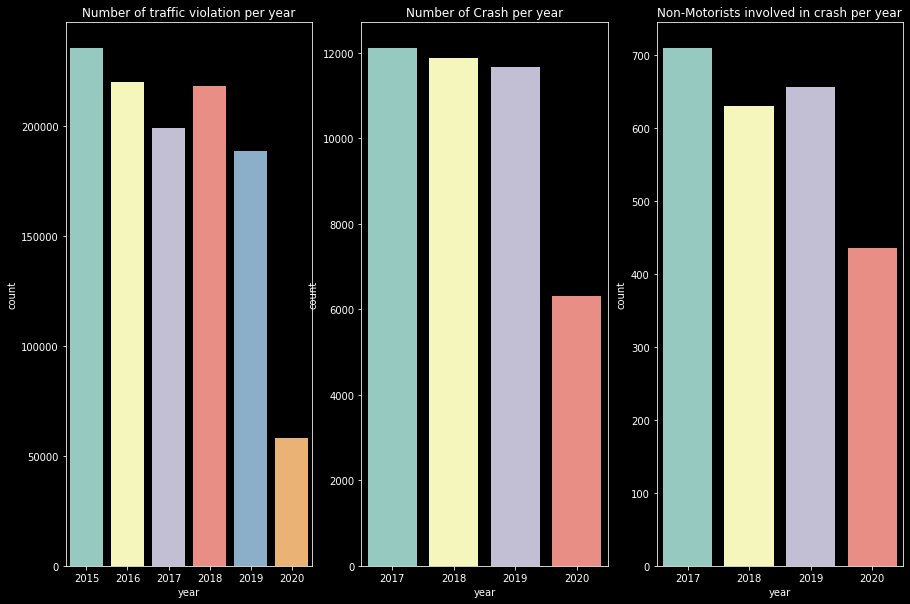

In [62]:
fig = plt.subplots(figsize=(15,10))
plt.subplot(1, 3, 1)
sns.countplot(traffic_new['year'])
plt.title('Number of traffic violation per year')
plt.subplot(1, 3, 2)
sns.countplot(CRI_new['year'])
plt.title('Number of Crash per year')
plt.subplot(1, 3, 3)
sns.countplot(CRNM_new['year'])
plt.title('Non-Motorists involved in crash per year')

# Merging Two Data Frames

## Checking for common column names

In [63]:
CRI_new.columns

Index(['ReportNumber', 'LocalCaseNumber', 'Agency', 'ACRSReportType',
       'CrashDate/Time', 'Hit/Run', 'RouteType', 'MilePoint',
       'MilePointDirection', 'LaneDirection', 'LaneNumber', 'LaneType',
       'NumberofLanes', 'Direction', 'Distance', 'DistanceUnit', 'RoadGrade',
       'NonTraffic', 'RoadName', 'Cross-StreetType', 'Cross-StreetName',
       'Off-RoadDescription', 'Municipality', 'RelatedNon-Motorist', 'AtFault',
       'CollisionType', 'Weather', 'SurfaceCondition', 'Light',
       'TrafficControl', 'DriverSubstanceAbuse', 'Non-MotoristSubstanceAbuse',
       'FirstHarmfulEvent', 'SecondHarmfulEvent', 'FixedOjectStruck',
       'Junction', 'IntersectionType', 'IntersectionArea', 'RoadAlignment',
       'RoadCondition', 'RoadDivision', 'Latitude', 'Longitude', 'Location',
       'date', 'year', 'month', 'time', 'hour', 'day', 'season', 'crash'],
      dtype='object')

In [64]:
CRNM_new.columns

Index(['ReportNumber', 'LocalCaseNumber', 'Agency', 'ACRSReportType',
       'CrashDate/Time', 'RouteType', 'RoadName', 'Cross-StreetType',
       'Cross-StreetName', 'Off-RoadDescription', 'Municipality',
       'RelatedNon-Motorist', 'CollisionType', 'Weather', 'SurfaceCondition',
       'Light', 'TrafficControl', 'DriverSubstanceAbuse',
       'Non-MotoristSubstanceAbuse', 'PersonID', 'PedestrianType',
       'PedestrianMovement', 'PedestrianActions', 'PedestrianLocation',
       'PedestrianObeyedTrafficSignal', 'PedestrianVisibility', 'AtFault',
       'InjurySeverity', 'SafetyEquipment', 'Latitude', 'Longitude',
       'Location', 'date', 'year', 'month', 'time', 'hour', 'day', 'season',
       'crash'],
      dtype='object')

In [65]:
# The following command gives the columns names which are common to different data frames
set(CRI_new.columns).intersection(set(CRNM_new.columns))

{'ACRSReportType',
 'Agency',
 'AtFault',
 'CollisionType',
 'CrashDate/Time',
 'Cross-StreetName',
 'Cross-StreetType',
 'DriverSubstanceAbuse',
 'Latitude',
 'Light',
 'LocalCaseNumber',
 'Location',
 'Longitude',
 'Municipality',
 'Non-MotoristSubstanceAbuse',
 'Off-RoadDescription',
 'RelatedNon-Motorist',
 'ReportNumber',
 'RoadName',
 'RouteType',
 'SurfaceCondition',
 'TrafficControl',
 'Weather',
 'crash',
 'date',
 'day',
 'hour',
 'month',
 'season',
 'time',
 'year'}

# Merging Crash Incident Data and Crash Non-Motorists Data

> Merged two data frames by selecting common column names which is listed below and defined new data frame *crash*.

In [66]:
merge_crash = pd.merge(CRI_new, CRNM_new, how='inner', on = ['Agency','ACRSReportType', 'CollisionType','Cross-StreetType',  'Cross-StreetName', 'DriverSubstanceAbuse', 'Location', 'Light','Latitude', 'Longitude', 'Municipality', 'Non-MotoristSubstanceAbuse','Off-RoadDescription', 'RelatedNon-Motorist', 'ReportNumber', 'RoadName', 'RouteType', 'SurfaceCondition',  'TrafficControl', 'Weather', 'date','month', 'time', 'year','season'])

In [67]:
merge_crash.columns

Index(['ReportNumber', 'LocalCaseNumber_x', 'Agency', 'ACRSReportType',
       'CrashDate/Time_x', 'Hit/Run', 'RouteType', 'MilePoint',
       'MilePointDirection', 'LaneDirection', 'LaneNumber', 'LaneType',
       'NumberofLanes', 'Direction', 'Distance', 'DistanceUnit', 'RoadGrade',
       'NonTraffic', 'RoadName', 'Cross-StreetType', 'Cross-StreetName',
       'Off-RoadDescription', 'Municipality', 'RelatedNon-Motorist',
       'AtFault_x', 'CollisionType', 'Weather', 'SurfaceCondition', 'Light',
       'TrafficControl', 'DriverSubstanceAbuse', 'Non-MotoristSubstanceAbuse',
       'FirstHarmfulEvent', 'SecondHarmfulEvent', 'FixedOjectStruck',
       'Junction', 'IntersectionType', 'IntersectionArea', 'RoadAlignment',
       'RoadCondition', 'RoadDivision', 'Latitude', 'Longitude', 'Location',
       'date', 'year', 'month', 'time', 'hour_x', 'day_x', 'season', 'crash_x',
       'LocalCaseNumber_y', 'CrashDate/Time_y', 'PersonID', 'PedestrianType',
       'PedestrianMovement', 'Pedes

In [68]:
print("dimension of crash incident data : ", CRI_new.shape)
print("dimension of crash non-motorists data : ", CRNM_new.shape)
print("dimension of merged crash data : ", merge_crash.shape)

dimension of crash incident data :  (41949, 52)
dimension of crash non-motorists data :  (2433, 40)
dimension of merged crash data :  (855, 67)


In [69]:
merge_crash.describe()

,MilePoint,LaneNumber,NumberofLanes,Distance,Latitude,Longitude,year,month,hour_x,crash_x,LocalCaseNumber_y,hour_y,crash_y
count,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.0,8.550000e+02,855.000000,855.0
mean,1.977105,0.990643,1.732164,34.808117,39.074868,-77.113592,2018.419883,8.881871,13.905263,1.0,1.800522e+08,13.905263,1.0
std,3.539459,0.893592,1.315404,104.103669,0.067977,0.088939,1.234867,2.332207,4.840951,0.0,2.962941e+07,4.840951,0.0
min,0.000000,0.000000,0.000000,0.000000,38.944588,-77.469412,2017.000000,1.000000,0.000000,1.0,1.705200e+04,0.000000,1.0
25%,0.000000,0.000000,1.000000,0.000000,39.015653,-77.187838,2017.000000,8.000000,10.000000,1.0,1.705394e+08,10.000000,1.0
50%,0.460000,1.000000,2.000000,0.000000,39.069927,-77.102535,2018.000000,9.000000,14.000000,1.0,1.800555e+08,14.000000,1.0
75%,2.240000,1.000000,3.000000,5.000000,39.126349,-77.047447,2020.000000,11.000000,18.000000,1.0,2.000188e+08,18.000000,1.0
max,27.310000,4.000000,7.000000,900.000000,39.311676,-76.918268,2020.000000,12.000000,23.000000,1.0,2.000415e+08,23.000000,1.0


# Merging Traffic Violation and Crash Data

> Merged two data frames by selecting common column names which is listed below and defined new data frame ***traffic_crash***.

In [70]:
# The following command gives the columns names which are common to different data frames
set(traffic_new.columns).intersection(set(merge_crash.columns))

{'Agency',
 'Latitude',
 'Location',
 'Longitude',
 'date',
 'month',
 'season',
 'time',
 'year'}

In [71]:
traffic_crash = pd.merge(traffic_new, merge_crash, how='inner', on = ['Agency', 'Latitude', 'Longitude', 'month', 'time', 'year','season'])

In [72]:
traffic_crash

,DateOfStop,TimeOfStop,Agency,SubAgency,Description,Location_x,Latitude,Longitude,Accident,Belts,...,PedestrianActions,PedestrianLocation,PedestrianObeyedTrafficSignal,PedestrianVisibility,AtFault_y,InjurySeverity,SafetyEquipment,hour_y,day_y,crash_y
0,2017-09-15,2020-10-25 15:20:00,MCP,"2nd District, Bethesda",NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...,3715 UNIVERSITY BLVD WEST,39.033540,-77.073625,1,0,...,NO IMPROPER ACTIONS,OTHER,0,MIXED CLOTHING,No,POSSIBLE INJURY,MC/BIKE HELMET,15,Friday,1
1,2018-10-20,2020-10-25 19:19:00,MCP,"2nd District, Bethesda",DRIVER FAILURE TO STOP FOR PEDESTRIAN IN CROSS...,OLD GEORGETOWN @ GLENBROOK,38.989170,-77.101440,1,0,...,NO IMPROPER ACTIONS,ON ROADWAY AT CROSSWALK,0,HEAD LIGHT,No,POSSIBLE INJURY,MC/BIKE HELMET,19,Saturday,1
2,2018-10-24,2020-10-25 13:30:00,MCP,"3rd District, Silver Spring",DRIVER FAILURE TO EXERCISE DUE CARE TO AVOID P...,801 ELLSWORTH DRIVE (FENTON ST GARAGE),38.997237,-77.025850,1,0,...,NO IMPROPER ACTIONS,OTHER,NO PED. SIGNAL,MIXED CLOTHING,No,SUSPECTED MINOR INJURY,NONE,13,Wednesday,1
3,2018-10-24,2020-10-25 13:30:00,MCP,"3rd District, Silver Spring",FAILURE TO CONTROL VEHICLE SPEED ON HIGHWAY TO...,801 ELLSWORTH DRIVE (FENTON ST GARAGE),38.997237,-77.025850,0,0,...,NO IMPROPER ACTIONS,OTHER,NO PED. SIGNAL,MIXED CLOTHING,No,SUSPECTED MINOR INJURY,NONE,13,Wednesday,1
4,2019-11-12,2020-10-25 06:58:00,MCP,"3rd District, Silver Spring",PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...,OAKVIEW DR @ MT PISGAH RD,39.015115,-76.976650,1,0,...,NO IMPROPER ACTIONS,AT INTERSECTION MARKED CROSSWALK,NO PED. SIGNAL,MIXED CLOTHING,No,SUSPECTED MINOR INJURY,NONE,6,Tuesday,1
5,2019-11-12,2020-10-25 06:58:00,MCP,"3rd District, Silver Spring",DRIVING MOTOR VEHICLE ON HIGHWAY WITHOUT REQUI...,OAKVIEW DR @ MT PISGAH RD,39.015115,-76.976650,1,0,...,NO IMPROPER ACTIONS,AT INTERSECTION MARKED CROSSWALK,NO PED. SIGNAL,MIXED CLOTHING,No,SUSPECTED MINOR INJURY,NONE,6,Tuesday,1
6,2019-11-12,2020-10-25 06:58:00,MCP,"3rd District, Silver Spring",DISPLAY SUSPENDED LIC.,OAKVIEW DR @ MT PISGAH RD,39.015115,-76.976650,1,0,...,NO IMPROPER ACTIONS,AT INTERSECTION MARKED CROSSWALK,NO PED. SIGNAL,MIXED CLOTHING,No,SUSPECTED MINOR INJURY,NONE,6,Tuesday,1
7,2019-11-12,2020-10-25 06:58:00,MCP,"3rd District, Silver Spring",POSSESSING SUSPENDED LIC.,OAKVIEW DR @ MT PISGAH RD,39.015115,-76.976650,1,0,...,NO IMPROPER ACTIONS,AT INTERSECTION MARKED CROSSWALK,NO PED. SIGNAL,MIXED CLOTHING,No,SUSPECTED MINOR INJURY,NONE,6,Tuesday,1
8,2019-11-12,2020-10-25 06:58:00,MCP,"3rd District, Silver Spring",DRIVER FAILURE TO STOP FOR PEDESTRIAN IN CROSS...,OAKVIEW DR @ MT PISGAH RD,39.015115,-76.976650,1,0,...,NO IMPROPER ACTIONS,AT INTERSECTION MARKED CROSSWALK,NO PED. SIGNAL,MIXED CLOTHING,No,SUSPECTED MINOR INJURY,NONE,6,Tuesday,1
9,2020-05-19,2020-10-25 13:03:00,MCP,"4th District, Wheaton",DRIVER FAILURE TO EXERCISE DUE CARE TO AVOID P...,ASPEN HILL RD / CONNECTICUT AVE SHOPPING,39.080340,-77.078635,1,0,...,NO IMPROPER ACTIONS,MIDBLOCK MARKED CROSSWALK,UNKNOWN,MIXED CLOTHING,No,POSSIBLE INJURY,NONE,13,Tuesday,1


In [73]:
print("dimension of crash incident data : ", merge_crash.shape)
print("dimension oftraffic violation data : ", traffic_new.shape)
print("dimension of merged  data : ", traffic_crash.shape)

dimension of crash incident data :  (855, 67)
dimension oftraffic violation data :  (1119076, 43)
dimension of merged  data :  (12, 103)


In [74]:
traffic_crash.columns

Index(['DateOfStop', 'TimeOfStop', 'Agency', 'SubAgency', 'Description',
       'Location_x', 'Latitude', 'Longitude', 'Accident', 'Belts',
       ...
       'PedestrianActions', 'PedestrianLocation',
       'PedestrianObeyedTrafficSignal', 'PedestrianVisibility', 'AtFault_y',
       'InjurySeverity', 'SafetyEquipment', 'hour_y', 'day_y', 'crash_y'],
      dtype='object', length=103)

In [75]:
# selecting the columns
columns = traffic_crash[['DateOfStop', 'TimeOfStop','SubAgency',  'Latitude', 'Longitude','Year_model', 'Make', 'Model', 'Color', 'ViolationType','CollisionType','Weather', 'SurfaceCondition', 'Light', 'TrafficControl','Gender','Race','year', 'month', 'time','season']]

In [76]:
#creating the new dataframe
traffic_crash_new = columns.copy()
traffic_crash.shape

(12, 103)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


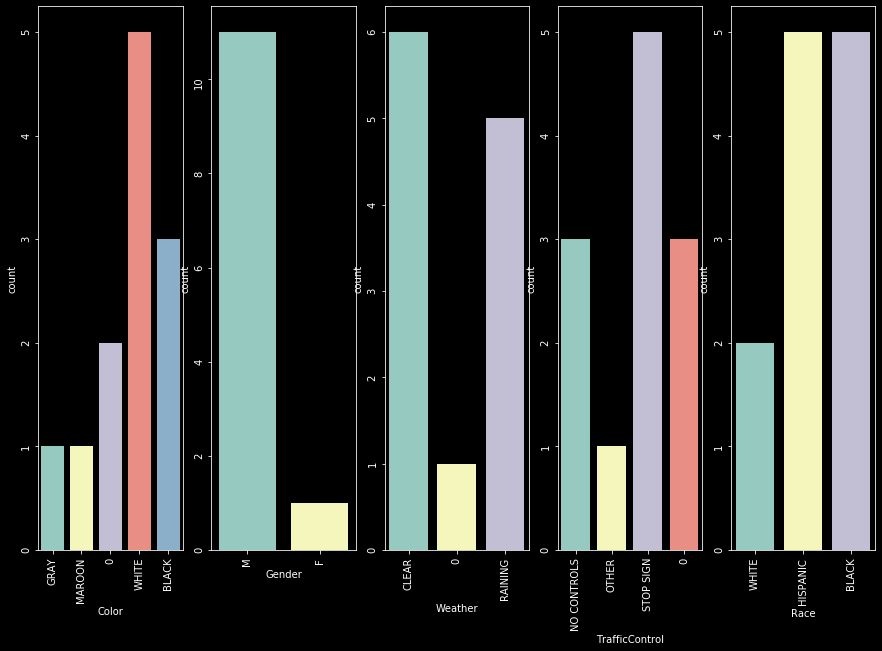

In [77]:
fig, ax = plt.subplots(1,5,figsize=(15,10))
sns.countplot(traffic_crash_new['Color'], ax=ax[0])
sns.countplot(traffic_crash_new['Gender'], ax=ax[1])
sns.countplot(traffic_crash_new['Weather'], ax=ax[2])
sns.countplot(traffic_crash_new['TrafficControl'], ax=ax[3])
sns.countplot(traffic_crash_new['Race'], ax=ax[4])
#ax.set_xticklabels(a2.get_xticklabels(), rotation=90)
for ax in fig.axes:
    ax.tick_params(labelrotation=90)
#fig.tight_layout(pad=3.0)
fig.show()
plt.savefig("test.jpg", dpi=300, bbox_inches="tight")

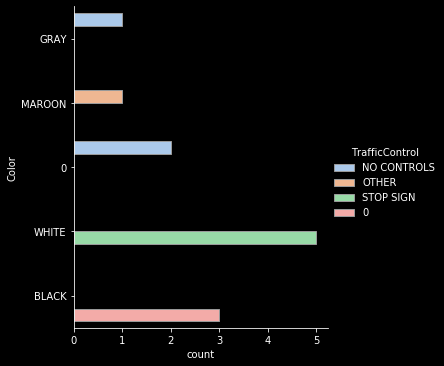

In [78]:
sns.catplot(y="Color", hue="TrafficControl", kind="count",
            palette="pastel", edgecolor=".6",
            data=traffic_crash_new)